<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        ✈️ Airlines Flights 💸
    </h1>
</div>


# 📂 Overview

**Background**

This dataset contains detailed records of **flight ticket listings** across major Indian airlines. It includes information about the **airline**, **flight number**, **cities of departure and arrival**, **time of departure and arrival**, **number of stops**, **travel class**, **flight duration**, **days left until departure**, and **ticket price**.

The dataset offers a rich opportunity to analyze **pricing patterns**, **flight schedules**, and **airline strategies** in the highly competitive Indian aviation market.

**Goal of the Project**

Build an analytical and predictive system to:

* **Predict flight prices** based on features like time of day, days left, airline, and stops
* Understand **factors influencing fare fluctuations** (e.g., airline, class, timing, or route)
* Help users or travel platforms **optimize booking decisions**

**Key Features**

| Feature Name       | Description                                                     |
| ------------------ | --------------------------------------------------------------- |
| `airline`          | Airline name (e.g., SpiceJet, Vistara, AirAsia)                 |
| `flight`           | Flight identifier or code (e.g., SG-8709)                       |
| `source_city`      | City from which the flight departs                              |
| `departure_time`   | Time slot of departure (e.g., Morning, Evening, Early\_Morning) |
| `stops`            | Number of stops (e.g., non-stop = "zero")                       |
| `arrival_time`     | Time slot of arrival (e.g., Morning, Afternoon, Night)          |
| `destination_city` | City where the flight lands                                     |
| `class`            | Travel class (e.g., Economy, Business)                          |
| `duration`         | Flight duration in hours (numeric float)                        |
| `days_left`        | Number of days left from booking date to flight departure       |
| `price`            | Ticket price in INR (target variable for regression)            |

**Files Provided**

* `airlines_flights_data.csv`: Contains over 10,000 flight records with complete flight and pricing metadata.

**Project Objective**

The goal of this notebook is to **model and predict flight prices** using key travel and airline attributes. The insights can help:

* Determine the **best time to book** a flight
* Understand **price drivers** in airline ticketing
* Provide fare prediction tools for travel platforms or users
* Support **airfare optimization strategies** for airlines

**Key Steps**

* **Exploratory Data Analysis (EDA):**
  Explore how ticket prices vary across airlines, classes, days left, departure time, and routes.

* **Feature Engineering:**
  Encode categorical features, extract useful temporal indicators (e.g., weekend vs weekday), and normalize numerical features like `duration`.

* **Modeling:**
  Use regression-based models to predict flight ticket prices:

  * Linear Regression
  * Random Forest Regressor
  * Gradient Boosting / XGBoost / LightGBM
  * Stacking or Ensemble techniques

* **Evaluation Framework:**
  Use cross-validation and evaluate model performance using:

  * RMSE (Root Mean Squared Error)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [41]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
import scikit_posthocs as sp
from scipy.stats import normaltest

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [42]:
# Load the datasets
df_airlines = pd.read_csv("airlines_flights_data.csv")
# Verify shapes
print("Data Shape:", df_airlines.shape)

Data Shape: (300153, 12)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [43]:
# Display few rows of dataset
print("Data Preview:")
display(df_airlines.head())

Data Preview:


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [44]:
# Display information about the DataFrames
print("Data Info:")
df_airlines.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **dataset** contains **300153** samples with **12** columns, including the target variable `price`.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `duration`, `days_left` and `price`.
     - **Categorical features:** `airline`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city` and `class`.
   - The target variable is **numerical** value.

**Data Completeness**  
   - The dataset have **no missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features are float64 and int64, categorical features are object.
   - The column `index` and `flight` is not meaningful for analysis. So this column is not really a part of the information we should care about. We can drop them.

In [45]:
df_airlines.columns = (
    df_airlines.columns
    .str.strip()
)

In [46]:
num_features = ["duration", "days_left", "price"]
cat_features = ["airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]
df_airlines.drop(columns="index", axis=1, inplace=True)
df_airlines.drop(columns="flight", axis=1, inplace=True)

print("Data describe:")
list_features_drop = ["Month", "Year", "Holidays_Count", "Days", "AQI"]
cm = sns.light_palette("blue", as_cmap=True)
display(df_airlines.drop(columns=cat_features, axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
duration,300153.000000,12.221021,7.191997,0.830000,6.830000,11.250000,16.170000,49.830000
days_left,300153.000000,26.004751,13.561004,1.000000,15.000000,26.000000,38.000000,49.000000
price,300153.000000,20889.660523,22697.767366,1105.000000,4783.000000,7425.000000,42521.000000,123071.000000


## Descriptive Insights – Numerical Features

1. **duration**

* The distribution appears slightly **right-skewed**, as the max value reaches almost **50 hours**, much higher than the median (11.25).
* Potential **outliers** exist, likely representing long or multi-leg flights.

2. **days_left**

* The maximum number of days left is capped at 49, possibly a system limitation.
* The distribution is relatively even, with the mean and median nearly equal → may be approximately **normally distributed**.
* This is a **very important feature** as booking time typically affects ticket price (earlier = cheaper).

3. **price**

* **Highly right-skewed distribution**: 75% of flights are priced below ₹42,521, but some tickets go up to ₹123,071.
* Large standard deviation → suggests presence of significant **outliers**, possibly business class or very long-haul flights.

In [47]:
print("Data describe:")
df_airlines.drop(columns=num_features, axis=1).describe().T

Data describe:


,count,unique,top,freq
airline,300153,6,Vistara,127859
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
class,300153,2,Economy,206666


## Descriptive Insights from Categorical Features

| Feature               | Summary                                                                                                                                        |
| --------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **airline**           | Contains **6 unique airlines**. **Vistara** is the most frequent, appearing in **127,859 flights** (over 42%).                                 |
| **source\_city**      | Has **6 departure cities**, with **Delhi** being the most common (**61,343 flights**).                                                         |
| **departure\_time**   | Consists of **6 time slots**, with **Morning** being the most common departure time (**71,146 flights**).                                      |
| **stops**             | Includes **3 stop categories**. Notably, **1-stop flights dominate with 250,863 instances (\~84%)** → highly imbalanced.                       |
| **arrival\_time**     | Has **6 arrival time slots**, with **Night** being the most frequent (**91,538 flights**).                                                     |
| **destination\_city** | Includes **6 destination cities**, with **Mumbai** as the most common destination (**59,097 flights**).                                        |
| **class**             | Contains only **2 classes**: **Economy** and Business. **Economy dominates** with **206,666 flights**. |                                       |


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [48]:
def displayNULL(df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)
        
        print("=" * 40)
        print(f"{dataset_name} Missing Value Analysis")
        print("=" * 40)
        
        if missing_count == 0:
            print(f"✅ No missing values detected in {rows:,} rows")
        else:
            print(f"⚠️  {missing_count} missing values found in {rows:,} rows")

displayNULL(df=df_airlines, dataset_name="Data", style=2)

Data Missing Value Analysis
✅ No missing values detected in 300,153 rows


## Checking duplicate Value

In [49]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

duplicate_summary = {}
check_duplicates_report(df=df_airlines, dataset_name="Data")
duplicate_summary["Data"] = {
    "duplicates": df_airlines.duplicated().sum(),
    "total_rows": len(df_airlines)
}

🔍 Data Duplicate Analysis
⚠️  2213 duplicates found (0.74%)
    Total rows affected: 2,213/300,153


## Checking Outlier Value

In [50]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)


checking_outlier(list_feature=num_features, df=df_airlines, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,duration,2110
1,price,123


## Data Quality Insights: Missing Values, Duplicates and Outliers

**Missing Values Analysis**

- We conducted a thorough check for missing values across the datasets.  
- **No missing values** in the datasets.

**Duplicate Records Analysis**

* **Finding:** \~2,213 duplicates (0.74%) detected — same flight details but different IDs.
* **Interpretation:** This likely reflects **real-world behavior** (e.g., family, friends, or groups booking the same flight together).

**Key Insight:** Duplicates with different IDs are not necessarily data errors — they may reflect multiple passengers on the same itinerary.

**Outliers Records Analysis**

- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [51]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [52]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

##  Price Distribution

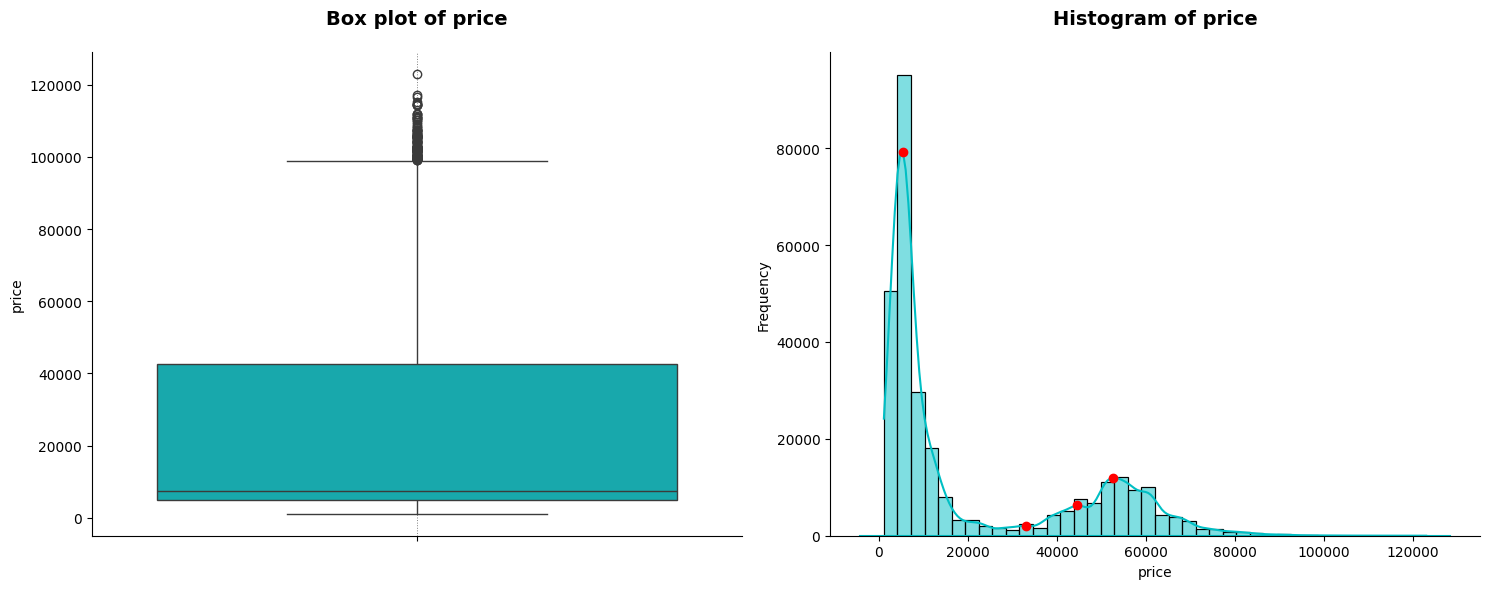

In [53]:
from scipy.signal import find_peaks
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.boxplot(data=df_airlines, y = "price", ax=ax[0], color="#00BFC4")
ax[0].set_title(f"Box plot of price", fontsize=14, pad=20, weight="bold")
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
ax[0].set_ylabel("price")
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

sns.histplot(data=df_airlines, x = "price", ax=ax[1], color="#00BFC4", kde=True, bins=40)
ax[1].set_title(f"Histogram of price", fontsize=14, pad=20, weight="bold")
ax[1].set_xlabel("price")
ax[1].set_ylabel("Frequency")
# ax[1].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

# Extract KDE values to find peaks
kde = sns.kdeplot(df_airlines["price"], ax=ax[1], color="#00BFC4").lines[0].get_data()
kde_x, kde_y = kde[0], kde[1]
peaks, _ = find_peaks(kde_y)

# Highlight peaks
for peak_idx in peaks:
    plt.plot(kde_x[peak_idx], kde_y[peak_idx], "ro")  # Red dots on peaks

plt.tight_layout()
plt.show()

**General Analysis of the Distribution of `price`**

**Box Plot:**

* The distribution of ticket prices shows a **very wide interquartile range (IQR)**, indicating high variability in typical fare levels.
* The **median price is relatively low**, around ₹7,000, while the **upper quartile reaches beyond ₹42,000**.
* A significant number of **extreme high values** appear beyond ₹100,000, which are clearly flagged as **outliers**.
* This suggests the dataset contains **premium fare classes (e.g., Business class or long-haul flights)** that drastically differ from the norm.
* The box plot highlights a **strong right-skew**, with a long upper tail and compressed lower range.

**Histogram:**

* The histogram confirms a **heavily right-skewed distribution**, with most ticket prices concentrated at the lower end:

  * A **sharp peak appears below ₹10,000**, indicating the dominance of low-cost fares.
  * Beyond ₹40,000, the **frequency drops dramatically**, but a **long tail** continues to nearly ₹125,000.
  * There are **multiple small peaks** (highlighted in red), suggesting **price banding behavior**, possibly linked to airline pricing tiers or class segmentation.

* This pattern indicates that **different classes (Economy vs Business)** or airline strategies might be **creating distinct price clusters**.

**Summary for Reporting:**

> The `price` variable shows a **strongly right-skewed distribution**, with most tickets priced under ₹10,000 and a long tail extending beyond ₹120,000. Numerous high-value outliers are present, likely driven by business class or complex flight itineraries. For modeling tasks, applying a **log transformation** to `price` may help stabilize variance and reduce skew. Additionally, identifying or separating fare **classes** can improve interpretability and predictive performance.

## Numerical Feature Distributions

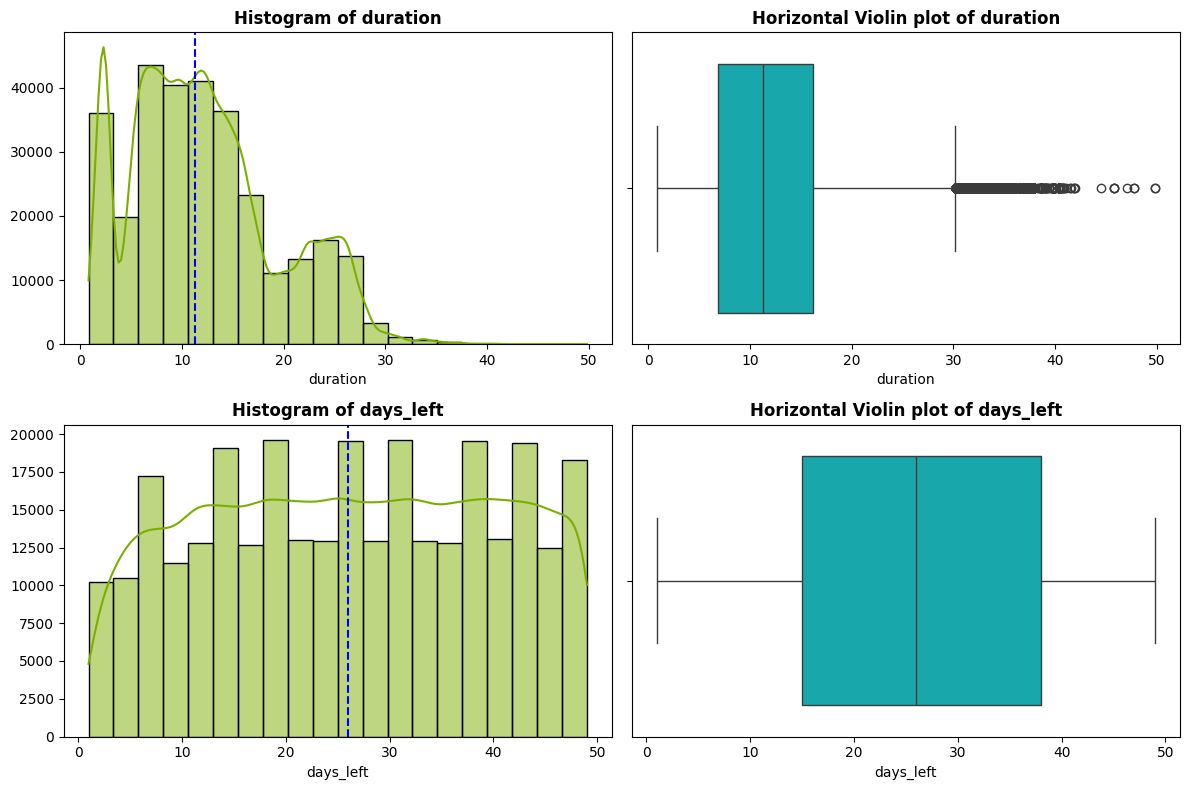

In [54]:
num_features = ["duration", "days_left"]
def plot_numerical_features(df=df_airlines, numerical_features = num_features):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], color="#7CAE00", bins = 20, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogram of {feature}", weight="bold")
        axes[i, 0].set_ylabel("")
        axes[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")

        sns.boxplot(data=df[feature], color="#00BFC4", orient="h", ax=axes[i, 1])
        axes[i, 1].set_title(f"Horizontal Violin plot of {feature}", weight="bold")
        axes[i, 1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

plot_numerical_features()

In [55]:
def check_skewness(data = df_airlines, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<10} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+10f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

num_features = ["duration", "days_left", "price"]
skew_feature, skew_df = check_skewness(data=df_airlines, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
price                          |  +1.061377 | Highly skewed
duration                       |  +0.602899 | Moderately skewed
days_left                      |  -0.035464 | Approximately symmetric
----------------------------------------------------------------------


### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

- **Histograms** reveal that all features are distributed fairly evenly across their respective ranges.
- **Box plot** confirm that the central 50% of values (the interquartile range), and the whiskers (showing the range).

**Skewness Analysis**

- The **skewness values** for numerical features (`days_left`) in dataset are less than 0.5, indicating that the distributions are **approximately symmetric**.

- The features: `price` and `duration`  have **skewness values** greater than 0.5, indicating that the distributions are **Highly/Moderately symmetric**. Many model assumes **normal distribution** but in reality data points may not be perfectly symmetric. If the data are skewed, then this kind of model will always underestimate the skewness risk.The more the data is skewed the less accurate the model will be. We need to handle skewness in chapter **Data Preprocessing**

## Correlation Analysis of Numerical Features

1. **What is Correlation?**

**Correlation** measures the **strength and direction of a linear relationship** between two variables.

* The correlation coefficient (usually denoted as **r**) ranges from **-1 to 1**.

2. **Interpretation of Correlation Values**

| Value of r | Relationship Type           | Interpretation                               |
| ---------- | --------------------------- | -------------------------------------------- |
| `r ≈ 1`    | Strong positive correlation | As X increases, Y also increases linearly    |
| `r ≈ -1`   | Strong negative correlation | As X increases, Y decreases linearly         |
| `r ≈ 0`    | No linear correlation       | No clear linear relationship between X and Y |

**Common interpretation of |r|**

![](https://i.ibb.co/TQ3FbQK/correlation.png)

3. **Pearson Correlation Formula**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}
$$

* $x_i, y_i$: observed values
* $\bar{x}, \bar{y}$: sample means of X and Y.

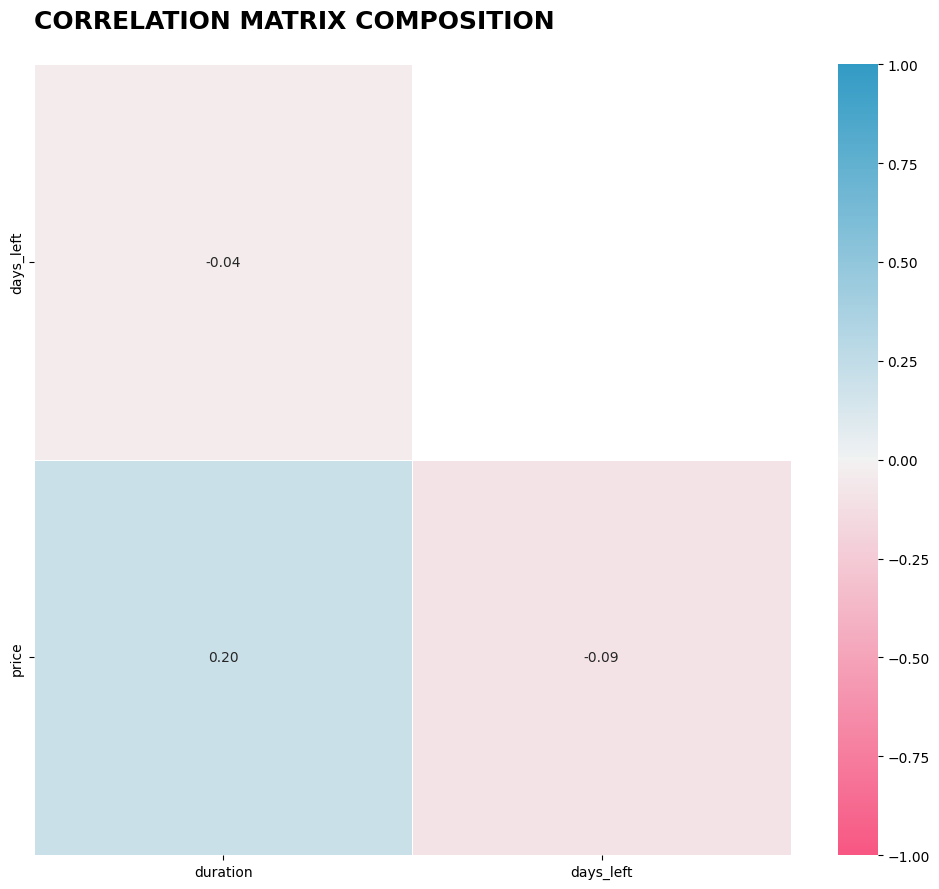

In [56]:
corr_matrix = df_airlines.drop(columns=cat_features, axis=1).corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION\n"
ax.set_title(title, loc="left", fontsize=18, weight="bold")

plt.tight_layout()
plt.show()

### **Insights from Correlation Analysis of Numerical Features**

**1. Overall Correlation Pattern**

* The correlations among numerical features are **weak to moderate**.
* No evidence of strong multicollinearity exists, which means these predictors can be retained in the model without severe redundancy.

> **Implication**:
> Models like **Linear Regression, Random Forest, or XGBoost** can utilize these features effectively, as weak correlations reduce the risk of collinearity problems.

**2. Notable Positive Correlations**

| Feature Pair         | Correlation | Interpretation                                                                          |
| -------------------- | ----------- | --------------------------------------------------------------------------------------- |
| `duration` & `price` | **0.20**    | Longer flight durations tend to have higher ticket prices, though the effect is modest. |

**3. Weak / Negative Correlations**

| Feature Pair             | Correlation | Interpretation                                                                    |
| ------------------------ | ----------- | --------------------------------------------------------------------------------- |
| `days_left` & `price`    | **-0.09**   | Slight negative trend: tickets booked closer to departure may cost slightly more. |
| `days_left` & `duration` | **-0.04**   | Practically no relationship between days left and flight duration.                |

**Summary for Reporting**

> The correlation matrix reveals that `duration` has a weak positive relationship with `price`, while `days_left` has a weak negative relationship with `price`. Overall, correlations are modest, suggesting that ticket prices are influenced by other categorical factors (e.g., airline, class, departure time) beyond just numerical variables. These weak correlations imply that incorporating categorical encodings will be critical for building strong predictive models.

## Categorical Feature Distributions

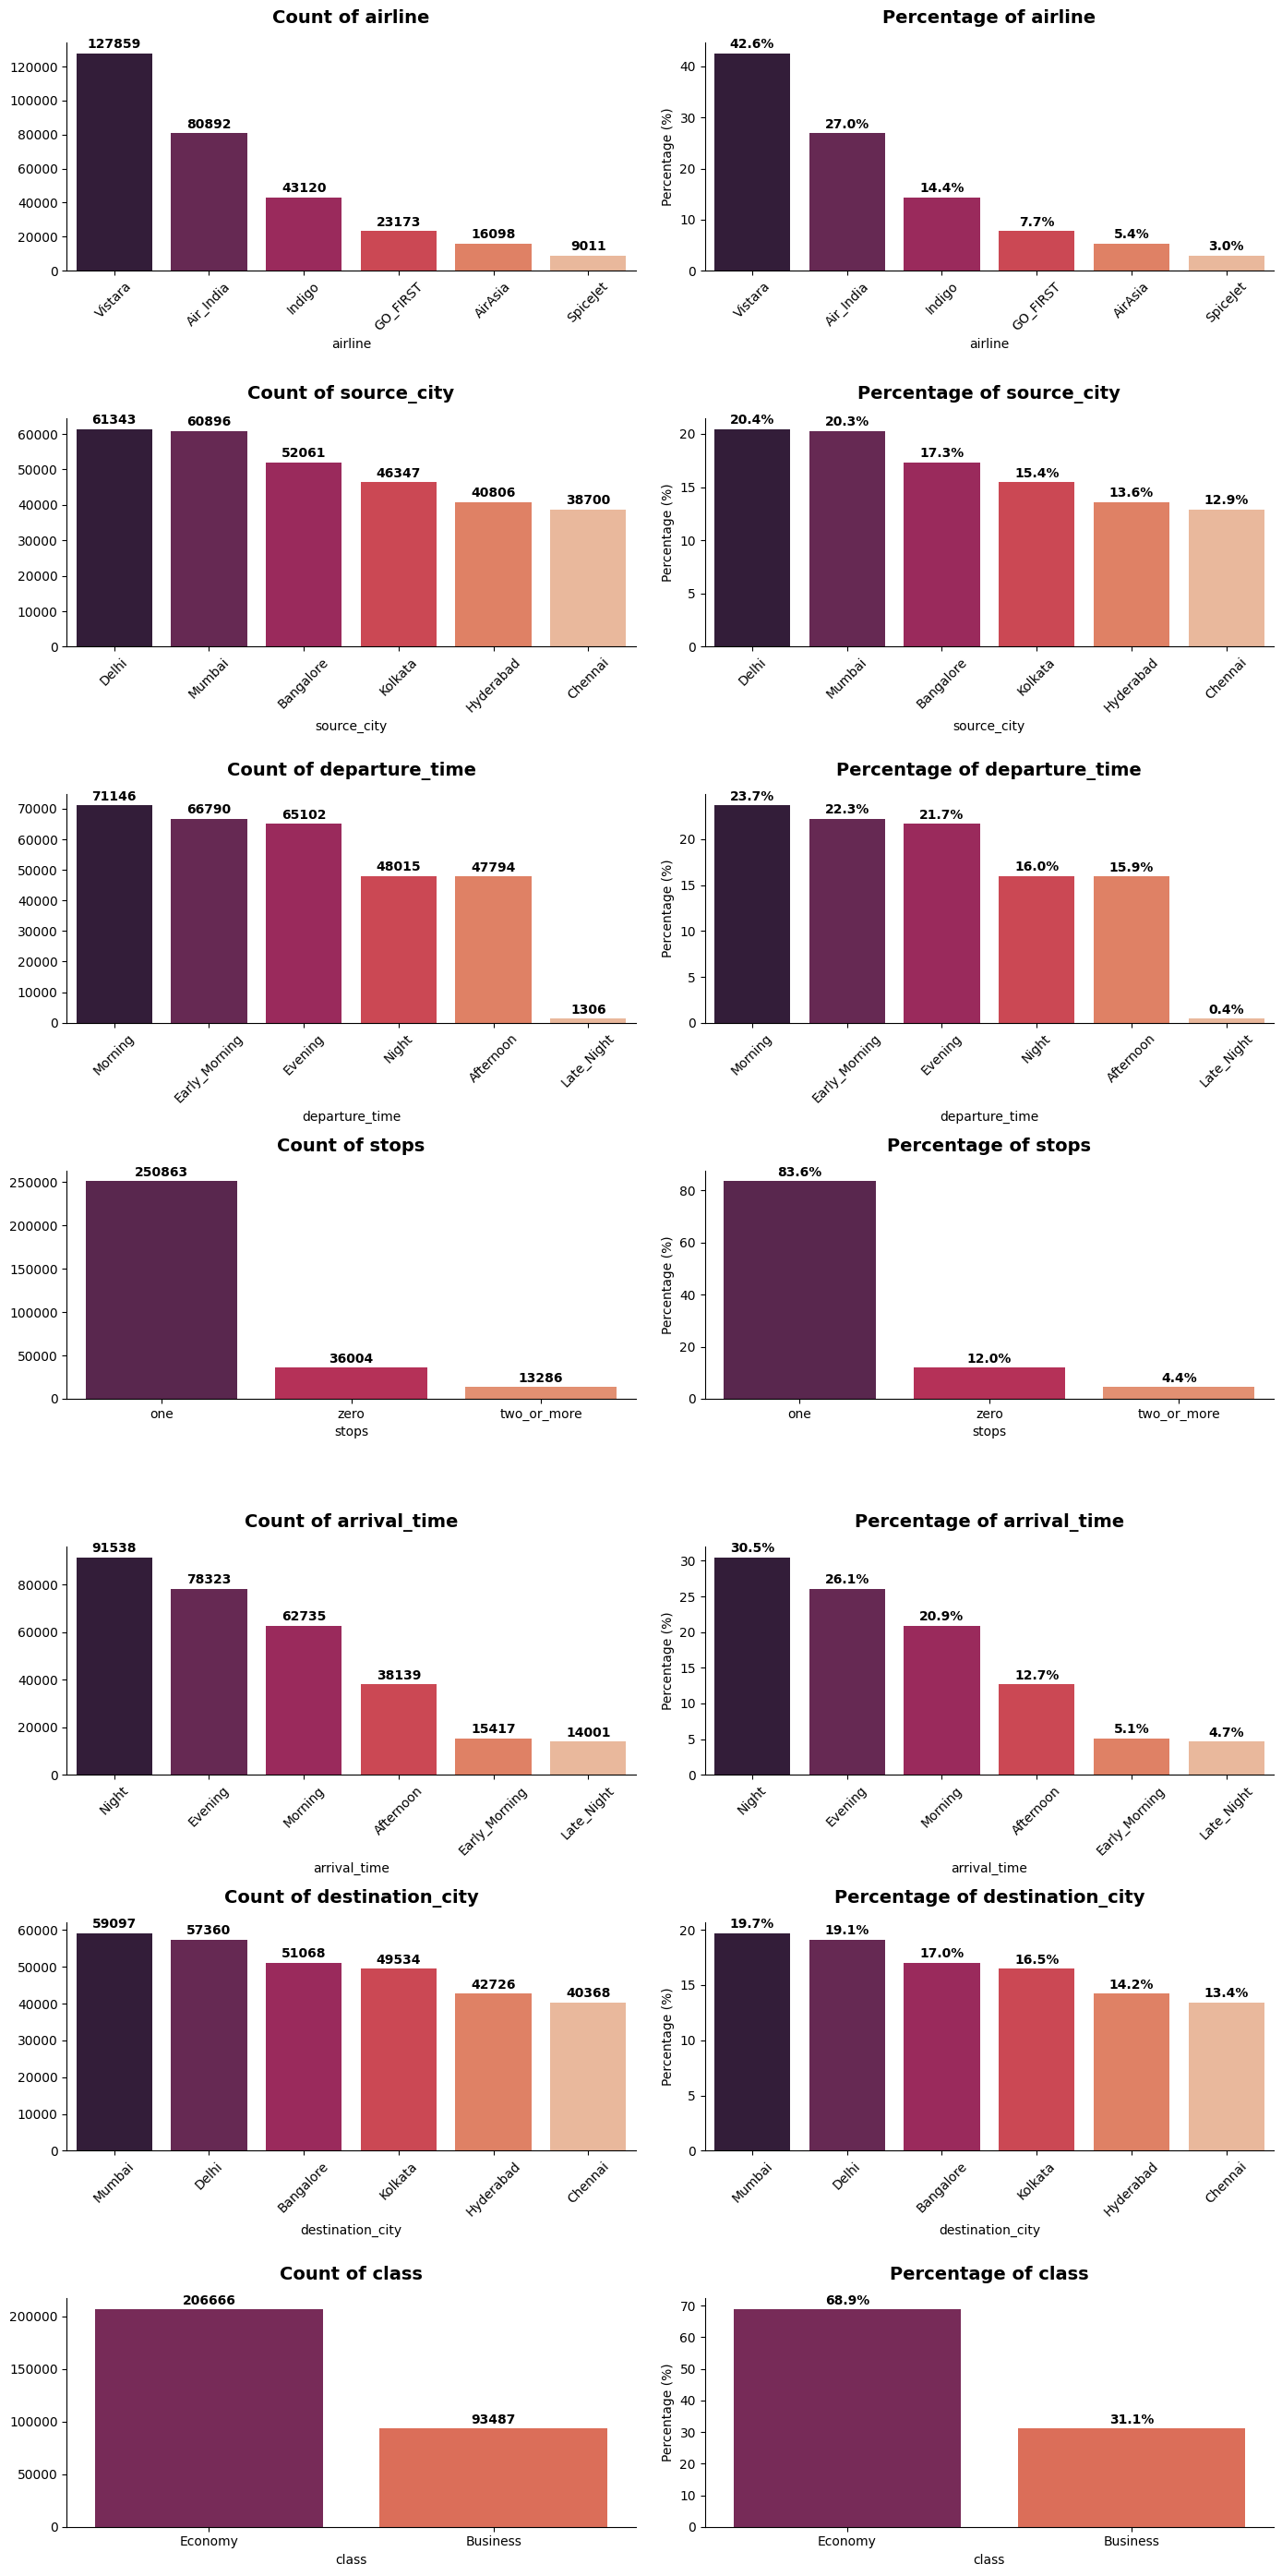

In [59]:
def plot_categorical_distribution_aligned(df, cat_features, palette_name="rocket"):
    n = len(cat_features)
    fig, ax = plt.subplots(n, 2, figsize=(14, n*4))
    ax = np.atleast_2d(ax)

    for i, feature in enumerate(cat_features):
        # ---- 1) Consistent order for both plots
        counts = df[feature].value_counts(dropna=False)        # keep order by frequency
        order = counts.index.tolist()

        # ---- 2) Map category → color (reuse for both plots)
        colors = sns.color_palette(palette_name, n_colors=len(order))
        color_map = {cat: c for cat, c in zip(order, colors)}
        # seaborn accepts a palette as dict if keys match categories
        palette_dict = color_map

        # ---- LEFT: Countplot (with consistent order & palette)
        sns.countplot(
            data=df, x=feature, order=order, ax=ax[i, 0],
            palette=palette_dict
        )
        ax[i, 0].set_title(f"Count of {feature}", fontsize=14, pad=15, weight="bold")
        ax[i, 0].set_xlabel(feature)
        ax[i, 0].set_ylabel("")
        sns.despine(ax=ax[i, 0], top=True, right=True)

        # Add count labels on top of bars
        y_max = ax[i, 0].get_ylim()[1]
        for p in ax[i, 0].patches:
            height = p.get_height()
            x = p.get_x() + p.get_width()/2
            ax[i, 0].text(x, height + 0.01*y_max, f"{int(height)}",
                          ha="center", va="bottom", fontsize=10, fontweight="bold")

        # ---- RIGHT: Percentage Barplot (with consistent order & palette)
        pct = (counts / counts.sum() * 100).reindex(order)     # reindex by order
        percentage_df = pd.DataFrame({feature: order, "Percentage": pct.values})

        sns.barplot(
            data=percentage_df, x=feature, y="Percentage",
            order=order, ax=ax[i, 1], palette=palette_dict
        )
        ax[i, 1].set_title(f"Percentage of {feature}", fontsize=14, pad=15, weight="bold")
        ax[i, 1].set_ylabel("Percentage (%)")
        ax[i, 1].set_xlabel(feature)
        sns.despine(ax=ax[i, 1], top=True, right=True)

        # Add % labels on top of bars
        y_max_r = ax[i, 1].get_ylim()[1]
        for p in ax[i, 1].patches:
            height = p.get_height()
            x = p.get_x() + p.get_width()/2
            ax[i, 1].text(x, height + 0.01*y_max_r, f"{height:.1f}%",
                          ha="center", va="bottom", fontsize=10, fontweight="bold")

        # Rotate x-axis labels if there are many categories
        rot = 45 if len(order) > 5 else 0
        ax[i, 0].tick_params(axis='x', rotation=rot)
        ax[i, 1].tick_params(axis='x', rotation=rot)

    plt.tight_layout()
    plt.show()

# Call the function:
plot_categorical_distribution_aligned(df=df_airlines, cat_features=cat_features)

### Insight on categorical Feature Distribution

**1. Airline**

* 6 airlines in the dataset.
* **Vistara \~42.6%**, **Air India \~27.0%**, **IndiGo \~19.5%**, while GO\_FIRST, SpiceJet, and AirAsia account for smaller shares.

**2. Source City**

* 6 departure cities.
* **Delhi (20.4%)** and **Mumbai (20.3%)** are the highest.
* Bangalore, Hyderabad, Kolkata, and Chennai make up the remainder with relatively balanced proportions.

**3. Departure Time**

* 6 departure time slots.
* **Morning (23.7%)**, **Early Morning (22.3%)**, and **Evening (21.7%)** dominate.
* Afternoon \~16.8%, Night \~15.1%, and Late Night is the lowest at \~0.4%.

**4. Stops**

* 3 categories of stops.
* **One-stop \~83.6%**, Zero-stop \~12.0%, and Two or more stops \~4.4%.

**5. Arrival Time**

* 6 arrival time slots.
* **Night (30.5%)** and **Evening (26.1%)** are the most frequent.
* Morning \~19.2%, Afternoon \~14.3%, Early Morning \~5.1%, Late Night \~4.7%.

**6. Destination City**

* 6 destination cities.
* **Mumbai (19.7%)** and **Delhi (19.1%)** are the top destinations.
* The other cities (Bangalore, Hyderabad, Kolkata, Chennai) have relatively similar shares.

**7. Class**

* 2 travel classes.
* **Economy (68.9%)**, **Business (31.1%)**.

## Bivariate Analysis

,airline,Count,Mean_target_feature,Median_target_feature,Std_target_feature
5,Vistara,127859,30396.536302,15543.000000,25637.159445
1,Air_India,80892,23507.019112,11520.000000,20905.116909
4,SpiceJet,9011,6179.278881,5654.000000,2999.630406
2,GO_FIRST,23173,5652.007595,5336.000000,2513.865560
3,Indigo,43120,5324.216303,4453.000000,3268.894831
0,AirAsia,16098,4091.072742,3276.000000,2824.055172


🔎 D’Agostino and Pearson Normality Test for 'price' across 'airline' groups

 Group: SpiceJet (n = 9011)
  Statistic : 4151.478
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: AirAsia (n = 16098)
  Statistic : 11571.771
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Vistara (n = 127859)
  Statistic : 1310860.266
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: GO_FIRST (n = 23173)
  Statistic : 14248.095
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Indigo (n = 43120)
  Statistic : 17849.543
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Air_India (n = 80892)
  Statistic : 1292801.032
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test:

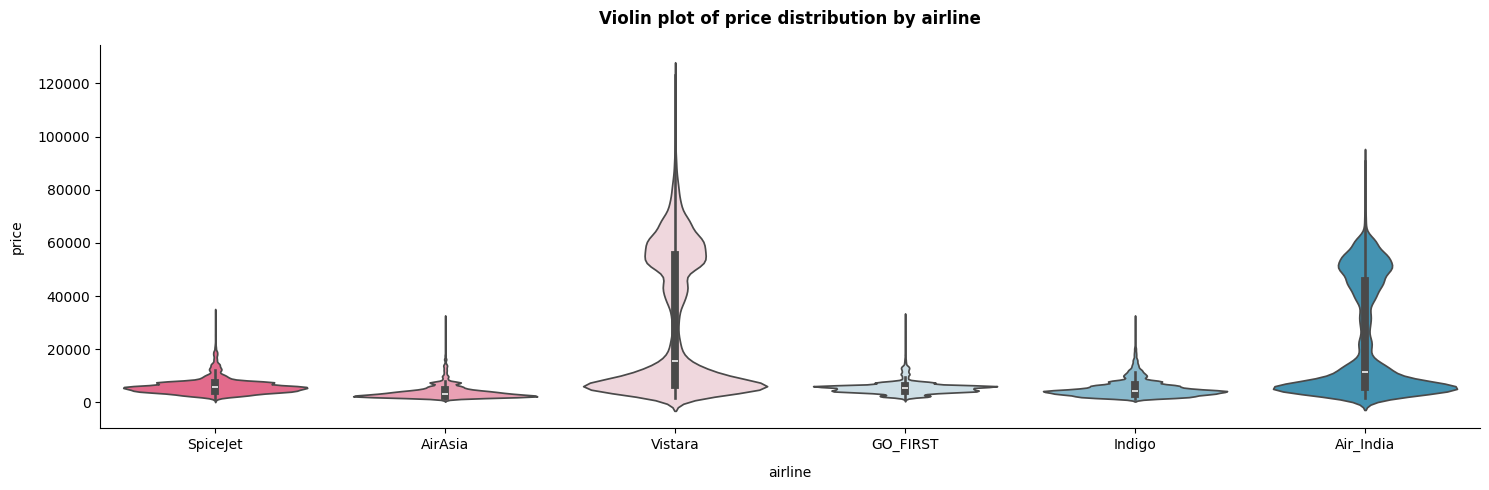

,source_city,Count,Mean_target_feature,Median_target_feature,Std_target_feature
1,Chennai,38700,21995.339871,7846.000000,23527.227014
4,Kolkata,46347,21746.235679,7958.000000,23439.972854
5,Mumbai,60896,21483.818839,7413.000000,23394.131784
0,Bangalore,52061,21469.460575,7488.000000,23171.386433
3,Hyderabad,40806,20155.623879,6855.000000,21720.652723
2,Delhi,61343,18951.326639,6840.000000,20920.410359


🔎 D’Agostino and Pearson Normality Test for 'price' across 'source_city' groups

 Group: Delhi (n = 61343)
  Statistic : 9353.873
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Mumbai (n = 60896)
  Statistic : 8630.258
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Bangalore (n = 52061)
  Statistic : 8103.458
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Kolkata (n = 46347)
  Statistic : 6664.196
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Hyderabad (n = 40806)
  Statistic : 5872.573
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Chennai (n = 38700)
  Statistic : 5647.071
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: price 

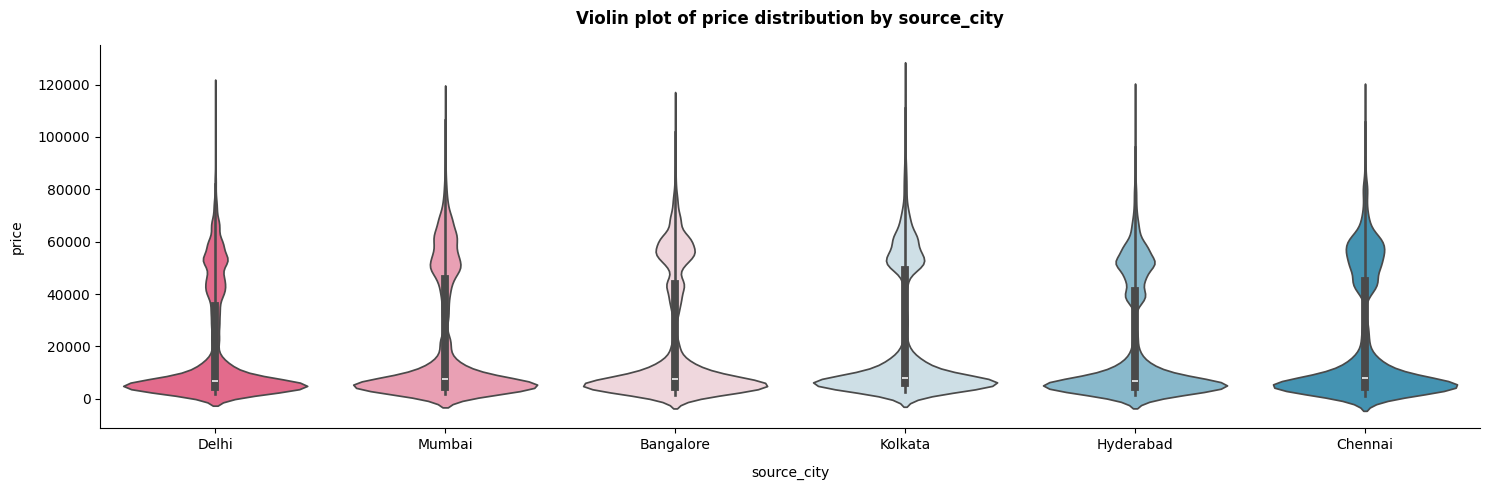

,departure_time,Count,Mean_target_feature,Median_target_feature,Std_target_feature
5,Night,48015,23062.146808,7813.000000,23617.883277
4,Morning,71146,21630.760254,8112.000000,22968.909569
2,Evening,65102,21232.361894,7425.000000,23168.515406
1,Early_Morning,66790,20370.676718,7212.000000,22354.875275
0,Afternoon,47794,18179.203331,6663.000000,20928.840445
3,Late_Night,1306,9295.299387,4499.000000,13680.515549


🔎 D’Agostino and Pearson Normality Test for 'price' across 'departure_time' groups

 Group: Evening (n = 65102)
  Statistic : 8995.192
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Early_Morning (n = 66790)
  Statistic : 9630.517
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Morning (n = 71146)
  Statistic : 9729.766
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Afternoon (n = 47794)
  Statistic : 8557.425
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Night (n = 48015)
  Statistic : 13227.988
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Late_Night (n = 1306)
  Statistic : 685.368
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Te

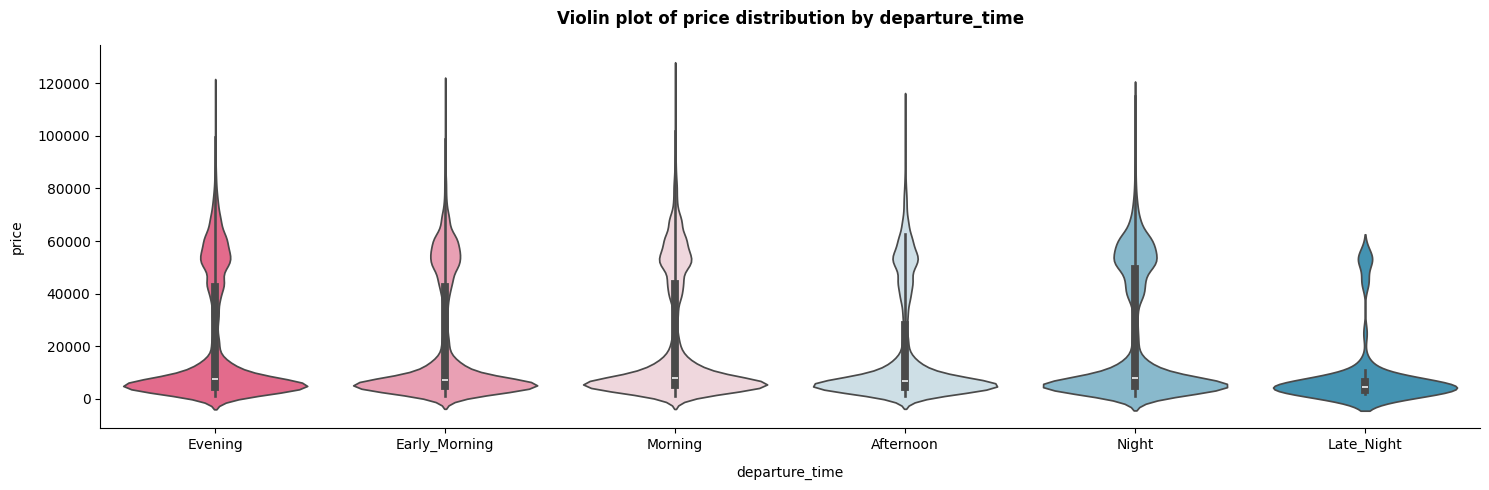

,stops,Count,Mean_target_feature,Median_target_feature,Std_target_feature
0,one,250863,22900.992482,7959.000000,23626.066584
1,two_or_more,13286,14113.450775,8307.000000,17664.332033
2,zero,36004,9375.938535,4499.000000,10623.008293


🔎 D’Agostino and Pearson Normality Test for 'price' across 'stops' groups

 Group: zero (n = 36004)
  Statistic : 8952.089
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: one (n = 250863)
  Statistic : 49897.784
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: two_or_more (n = 13286)
  Statistic : 7874.591
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: price ~ stops
Kruskal-Wallis H-statistic: 20484.299
p-value: 0.0
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                      one   two_or_more  zero
one          1.000000e+00  4.391040e-08   0.0
two_or_more  4.391040e-08  1.000000e+00   0.0
zero         0.000000e+00  0.000000e+00   1.0


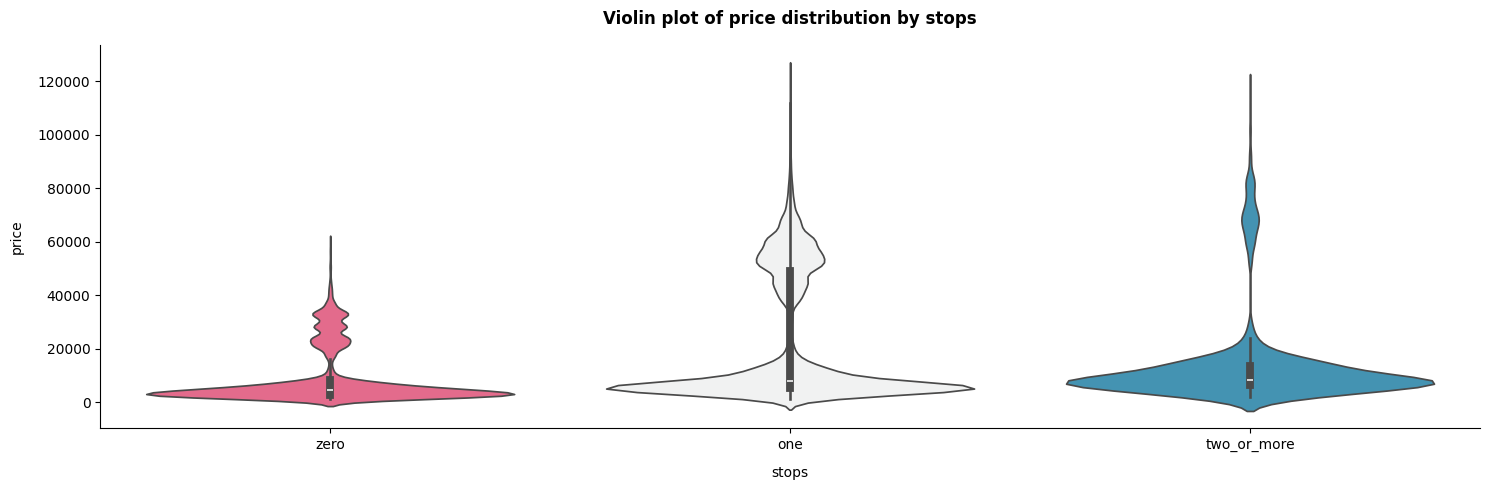

,arrival_time,Count,Mean_target_feature,Median_target_feature,Std_target_feature
2,Evening,78323,23044.371615,8854.000000,23494.642663
4,Morning,62735,22231.076098,7687.000000,23266.076096
5,Night,91538,21586.758341,7584.000000,23298.011624
0,Afternoon,38139,18494.598993,6714.000000,20430.012514
1,Early_Morning,15417,14993.139521,5800.000000,18898.694495
3,Late_Night,14001,11284.906078,4867.000000,16399.121594


🔎 D’Agostino and Pearson Normality Test for 'price' across 'arrival_time' groups

 Group: Night (n = 91538)
  Statistic : 12690.012
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Morning (n = 62735)
  Statistic : 9603.717
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Early_Morning (n = 15417)
  Statistic : 3883.718
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Afternoon (n = 38139)
  Statistic : 5794.202
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Evening (n = 78323)
  Statistic : 13724.865
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Late_Night (n = 14001)
  Statistic : 5916.505
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis T

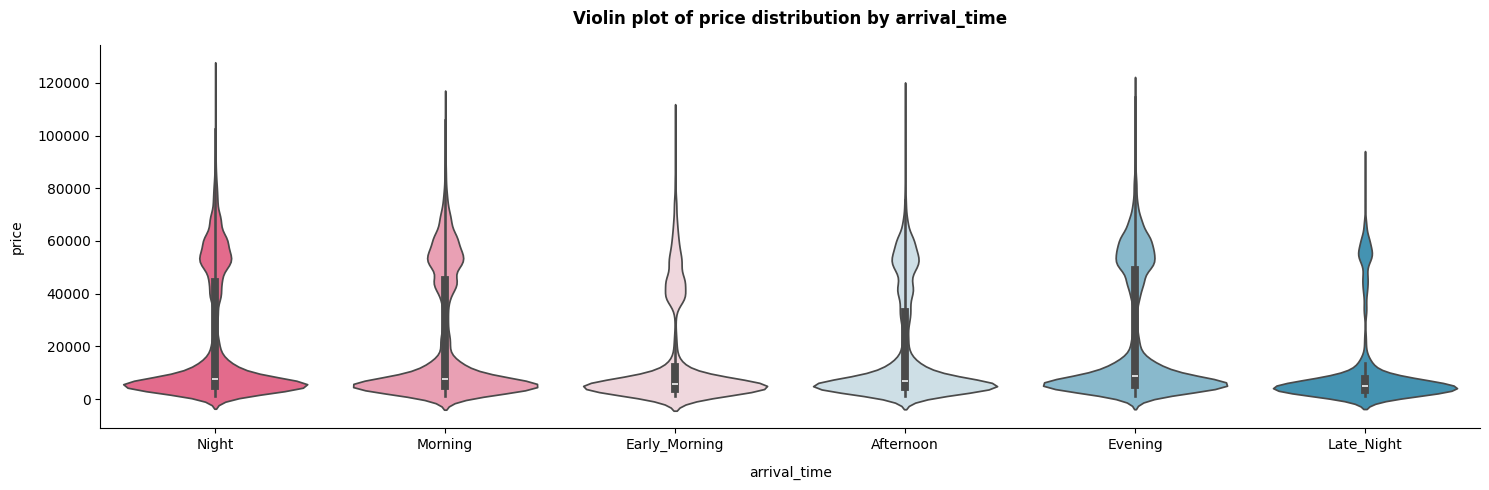

,destination_city,Count,Mean_target_feature,Median_target_feature,Std_target_feature
4,Kolkata,49534,21959.557556,7767.000000,23750.590141
1,Chennai,40368,21953.323969,7900.000000,23189.300129
0,Bangalore,51068,21593.955784,7425.000000,23271.409165
5,Mumbai,59097,21372.529469,7496.000000,23409.185278
3,Hyderabad,42726,20427.661284,7548.000000,21840.231366
2,Delhi,57360,18436.767870,6521.000000,20485.727116


🔎 D’Agostino and Pearson Normality Test for 'price' across 'destination_city' groups

 Group: Mumbai (n = 59097)
  Statistic : 8237.983
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Bangalore (n = 51068)
  Statistic : 7588.394
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Kolkata (n = 49534)
  Statistic : 7273.998
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Hyderabad (n = 42726)
  Statistic : 5893.536
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Chennai (n = 40368)
  Statistic : 7119.153
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Delhi (n = 57360)
  Statistic : 9166.933
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: p

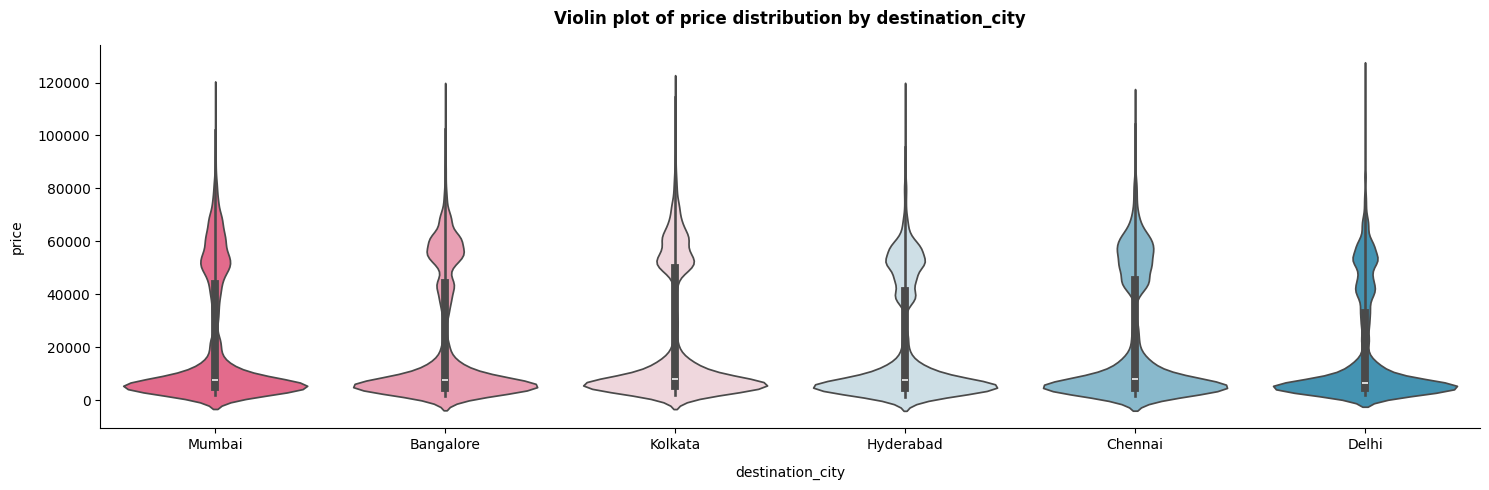

,class,Count,Mean_target_feature,Median_target_feature,Std_target_feature
0,Business,93487,52540.081124,53164.000000,12969.314606
1,Economy,206666,6572.342383,5772.000000,3743.519517


🔎 D’Agostino and Pearson Normality Test for 'price' across 'class' groups

 Group: Economy (n = 206666)
  Statistic : 69963.756
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Business (n = 93487)
  Statistic : 1477.461
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'price' by 'class'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 6234631.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Business' has a higher median 'price' than Group 'Economy'.


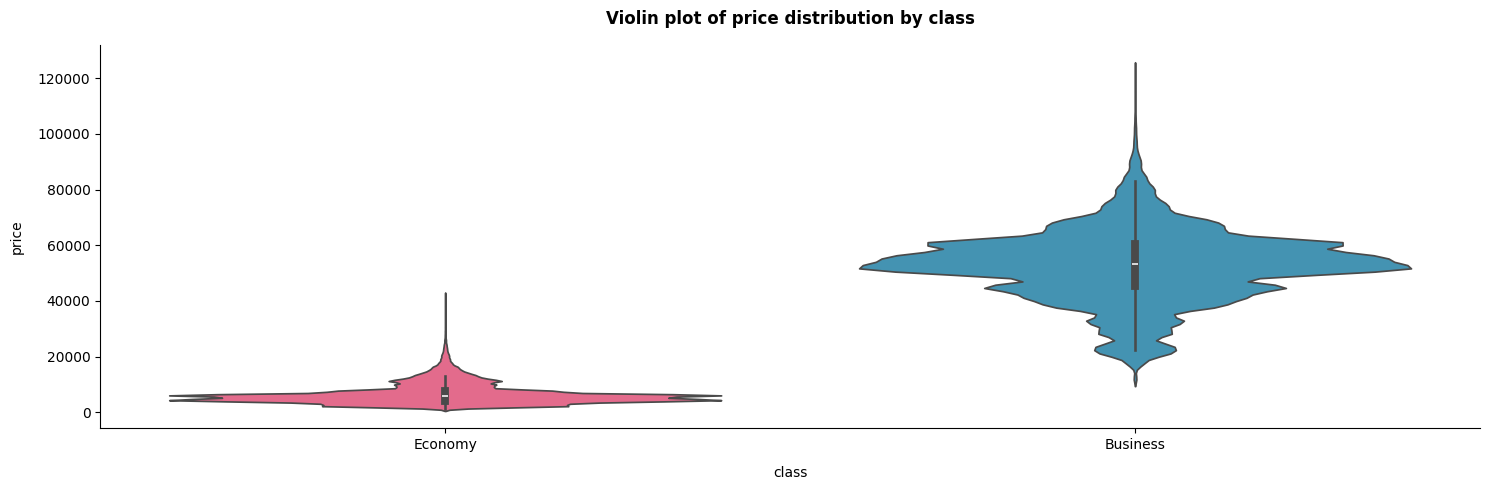

In [60]:
from IPython.core.display import HTML
target_feature = "price"
def perform_statical_testing(total_categories, feature, df_train = df_airlines, target_feature = target_feature):
    cal_normaltest(cat_feature=feature, num_feature=target_feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=feature, num_feature=target_feature)
    else:
        perform_kruskal_test(df=df_train, categorical_feature=feature, numeric_feature=target_feature)

def plot_categorical_distribution_by_target_feature(feature, df_train = df_airlines, target_feature = target_feature, order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violin and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the grouping variable (categorical).
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = feature, as_index= False)\
    .agg (
        Count = (target_feature, "count"),
        Mean_target_feature = (target_feature, "mean"),
        Median_target_feature = (target_feature, "median"),
        Std_target_feature = (target_feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean_target_feature", ascending=False)    

    summary_data = [
        ("Total Categories", f"{df_summary_feature.shape[0]}"),
        ("Overall Target Mean", f"{df_train[target_feature].mean():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cmap).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(total_categories=df_summary_feature.shape[0], 
                             feature=feature, df_train=df_train, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.violinplot(x=feature, y=target_feature, data=df_train, hue=feature, 
                palette=color(n_colors=df_train[feature].nunique()), ax=ax)
    ax.set_title(f"Violin plot of {target_feature} distribution by {feature}", pad=15, weight = "bold")
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel(target_feature, labelpad=10)
    # plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)

    plt.tight_layout()
    plt.show()

for feature in cat_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {target_feature} by {feature}</b></h2>"))
    plot_categorical_distribution_by_target_feature(feature=feature)

### Insight for Categorical Features by price

`Airline`

* **Vistara** and **Air India** position themselves in the higher price segment.
* **AirAsia, Indigo, SpiceJet, and GO\_FIRST** operate mainly in the low-cost segment.
* Price differences between airlines are **statistically significant** and align with market characteristics (full-service vs. low-cost carriers).

`source_city`

Ticket prices vary significantly depending on the source city. **Delhi generally offers cheaper flights**, while **Chennai and Kolkata are more expensive**. Despite city-level differences, all groups share the same pattern: **high variability and strong right skewness in prices**.

`departure_time`

Flight prices **vary notably by departure time**.

* **Morning and Night flights** are generally **more expensive**.
* **Afternoon and especially Late Night flights** are **cheaper options**.
  This reflects a potential **time-based pricing strategy** and **demand-driven differences** in ticket costs.
  
`stops`

Ticket prices vary significantly by the number of stops. **One-stop flights** tend to be the most expensive, while **non-stop flights** are generally the cheapest.

`arrival_time`

In summary, **arrival_time has a clear impact on ticket pricing**. Evening and Morning flights tend to be priced higher, while Early Morning and Late Night flights are typically cheaper.

`destination_city`

In summary, **destination city has a strong impact on flight prices**. Delhi consistently emerges as the **least expensive** destination, while Kolkata, Chennai, and Bangalore tend to be **higher-priced markets**.

`class`

Class is the most important factor influencing ticket price: **Business fares are several times higher than Economy**, with a statistically significant difference.

**SUMMARY TABLE**

| Feature / Analysis Area  | Key Insights                                                                                                                                                                                                                                                      | Statistical Significance                 | Practical Implication                                                           |
| ------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------- | ------------------------------------------------------------------------------- |
| **Airline**              | - Vistara & Air India → higher price segment.<br>- AirAsia, Indigo, SpiceJet, GO\_FIRST → low-cost carriers.<br>- Differences reflect **full-service vs. low-cost strategy**.                                                                                     | Kruskal–Wallis & Dunn’s: p < 0.05.       | Airline is a strong determinant of ticket price → important for pricing models. |
| **Source City**          | - Prices vary by city.<br>- Delhi → cheaper flights.<br>- Chennai & Kolkata → more expensive.<br>- All cities show **high variability & right-skewness**.                                                                                                         | Kruskal–Wallis: p < 0.05.                | Geographic factor matters → include as categorical predictor.                   |
| **Departure Time**       | - Morning & Night flights → more expensive.<br>- Afternoon & Late Night → cheaper.<br>- Reflects **time-based pricing & demand-driven differences**.                                                                                                              | Kruskal–Wallis & Dunn’s: p < 0.05.       | Suggests **dynamic pricing models** should integrate departure time.            |
| **Stops**                | - Ticket prices vary sharply.<br>- **One-stop flights most expensive**, while **non-stop flights cheapest**.<br>- Possibly due to demand-supply balance or airline strategies.                                                                                    | Kruskal–Wallis: p < 0.05.                | Critical operational factor → must be modeled as categorical variable.          |
| **Arrival Time**         | - Evening & Morning → higher prices.<br>- Early Morning & Late Night → cheaper.<br>- Clear time-slot based impact on pricing.                                                                                                                                     | Kruskal–Wallis & Dunn’s: p < 0.05.       | Reinforces **demand segmentation by time** in pricing optimization.             |
| **Destination City**     | - Delhi consistently cheapest.<br>- Kolkata, Chennai, Bangalore → higher-priced.<br>- Strong city-level differences.                                                                                                                                              | Kruskal–Wallis & Dunn’s: p < 0.05.       | Destination is a **key driver** of ticket price variation.                      |
| **Class**                | - Business avg. fare \~52,540 vs. Economy \~6,572.<br>- \~8x higher.<br>- Mann–Whitney U confirms **significant difference**.<br>- Most dominant factor for pricing.                                                                                              | Mann–Whitney U: p < 0.05.                | Strongest predictor of price → critical categorical feature.                    |
| **Correlation Analysis** | - `duration` price (weak positive, **0.20**).<br>- `days_left` price (weak negative, **-0.09**).<br>- No strong multicollinearity detected.<br>- Suggests duration and booking lead time still impact ticket pricing, though weaker than categorical factors. | Correlation only (no significance test). | Add as numerical features; useful in regression and tree-based models.          |



## Multivariate Analysis (Let’s address some questions)

In [61]:
df_airlines_ma = df_airlines.copy()

### Q.1. What are the airlines in the dataset, accompanied by their frequencies?

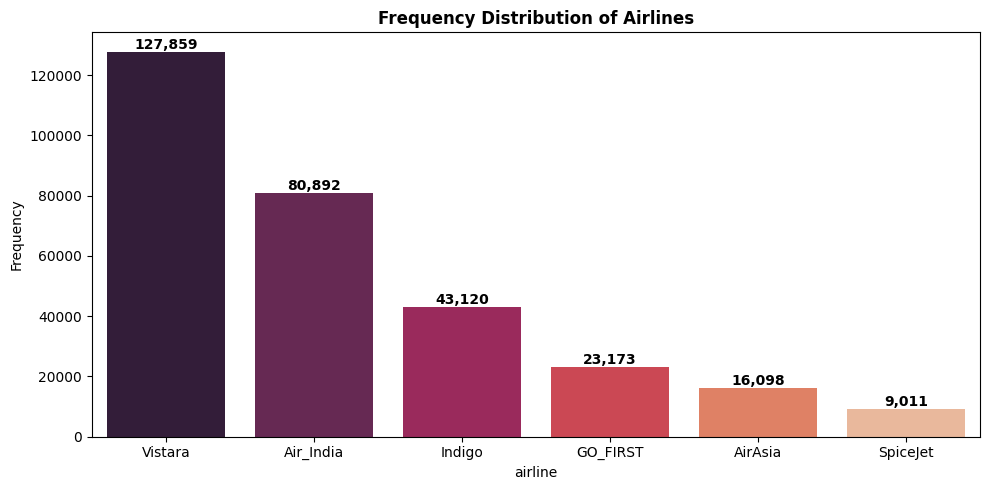

In [70]:
counts = df_airlines_ma["airline"].value_counts(dropna=False, ascending=False)
order = counts.index.tolist()

# ---- 2) Map category → color (reuse for both plots)
colors = sns.color_palette("rocket", n_colors=len(order))
color_map = {cat: c for cat, c in zip(order, colors)}
# seaborn accepts a palette as dict if keys match categories
palette_dict = color_map

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_airlines_ma, x="airline", palette=palette_dict, order=order)
plt.title("Frequency Distribution of Airlines", weight="bold")
plt.xlabel("airline")
plt.ylabel("Frequency")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height):,}",
                (p.get_x() + p.get_width() / 2., height),
                ha="center", va="bottom",
                fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

**Answer**

* There are **6 airlines** in the dataset.
* **Vistara** has the highest frequency (\~127k).
* Followed by **Air\_India** (\~81k).
* Other airlines such as **Indigo (\~43k)**, **GO\_FIRST (\~23k)**, **AirAsia (\~17k)**, and **SpiceJet (\~9k)** appear significantly less often.

### Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

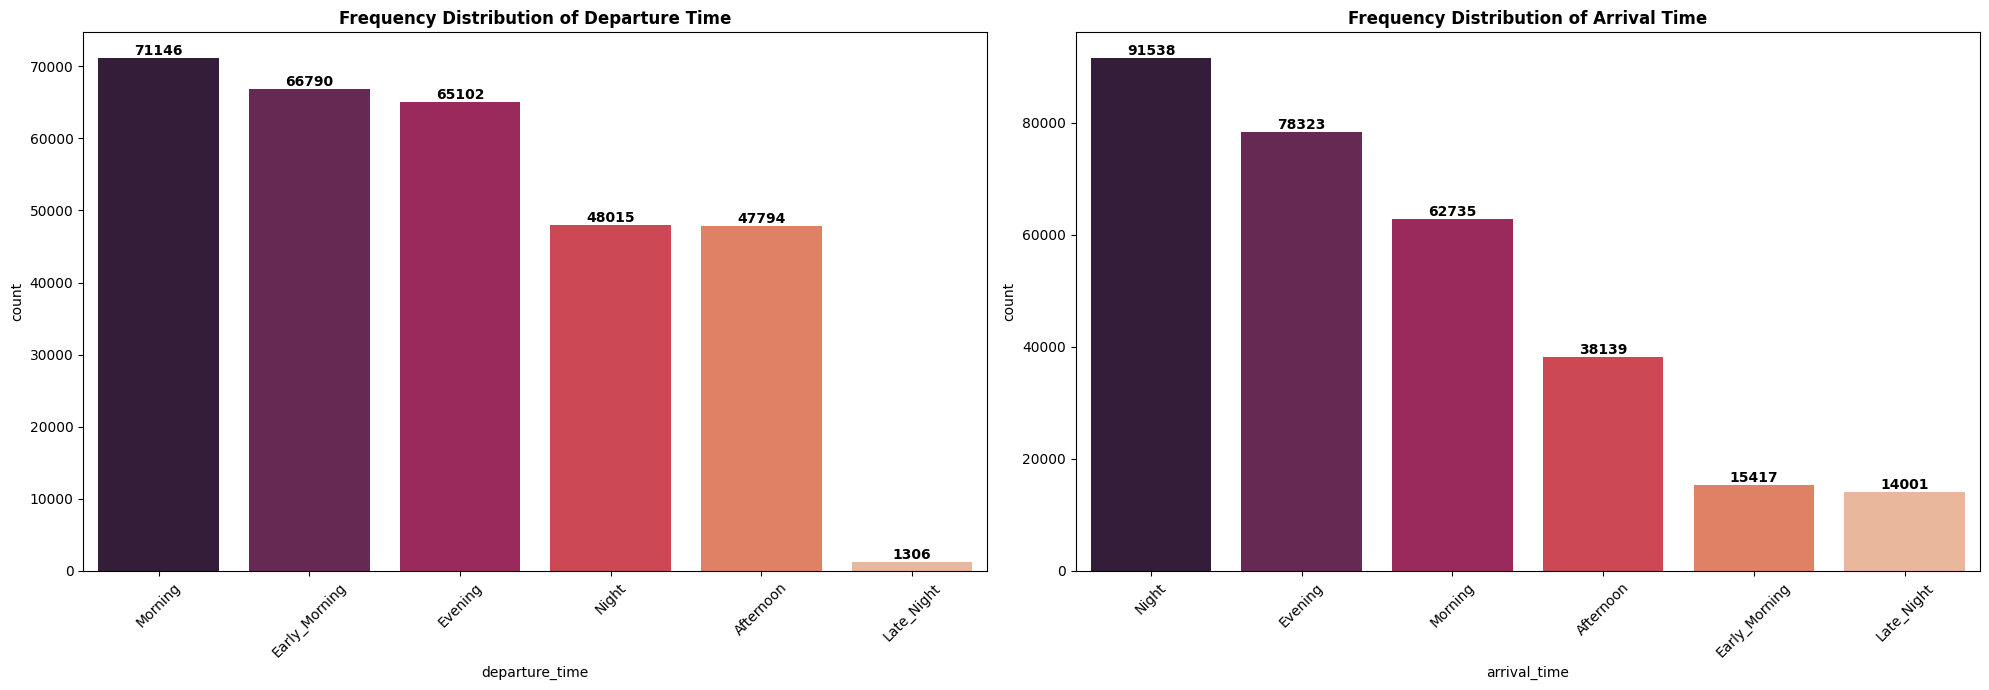

In [73]:
def color_map(feature):
    counts = df_airlines_ma[feature].value_counts(dropna=False, ascending=False)
    order = counts.index.tolist()

    # ---- 2) Map category → color (reuse for both plots)
    colors = sns.color_palette("rocket", n_colors=len(order))
    color_map = {cat: c for cat, c in zip(order, colors)}
    # seaborn accepts a palette as dict if keys match categories
    palette_dict = color_map
    return palette_dict, order

plt.figure(figsize=(20, 7))

palette_dict, order = color_map("departure_time")

# --- Barplot 1 ---
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=df_airlines_ma, x="departure_time",
                  palette=palette_dict, order=order)
plt.title("Frequency Distribution of Departure Time", weight = "bold")
plt.xticks(rotation=45)
plt.legend().remove()

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', label_type="edge", fontsize=10, weight = "bold")

palette_dict2, order2 = color_map("arrival_time")
# --- Barplot 2 ---
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=df_airlines_ma, x="arrival_time", 
                  palette=palette_dict2, order=order2)
plt.title("Frequency Distribution of Arrival Time", weight = "bold")
plt.xticks(rotation=45)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', label_type="edge", fontsize=10, weight = "bold")

plt.tight_layout()
plt.show()

**Insight:**

**Departure Time**

* Flights are most concentrated in the **Morning (71k)**, followed by **Early Morning (66k)** and **Evening (65k)**.
* **Afternoon (48k)** and **Night (48k)** flights have lower frequencies.
* **Late Night (only \~1.3k)** is very rare and almost negligible.

**Arrival Time**

* The most common arrival times are **Night (91k)** and **Evening (78k)**.
* **Morning (62k)** arrivals also represent a significant share.
* Less common arrival times include **Afternoon (38k)**, **Early Morning (15k)**, and especially **Late Night (14k)**.

Overall, **most flights depart in the morning and evening, while arrivals peak in the evening and night**.
This reflects **schedule alignment with passenger travel habits** (preferring morning/evening flights to optimize daytime activities) and may also be influenced by **airport slot allocation**.

### Q.3. Show Bar Graphs representing the Source City & Destination City.

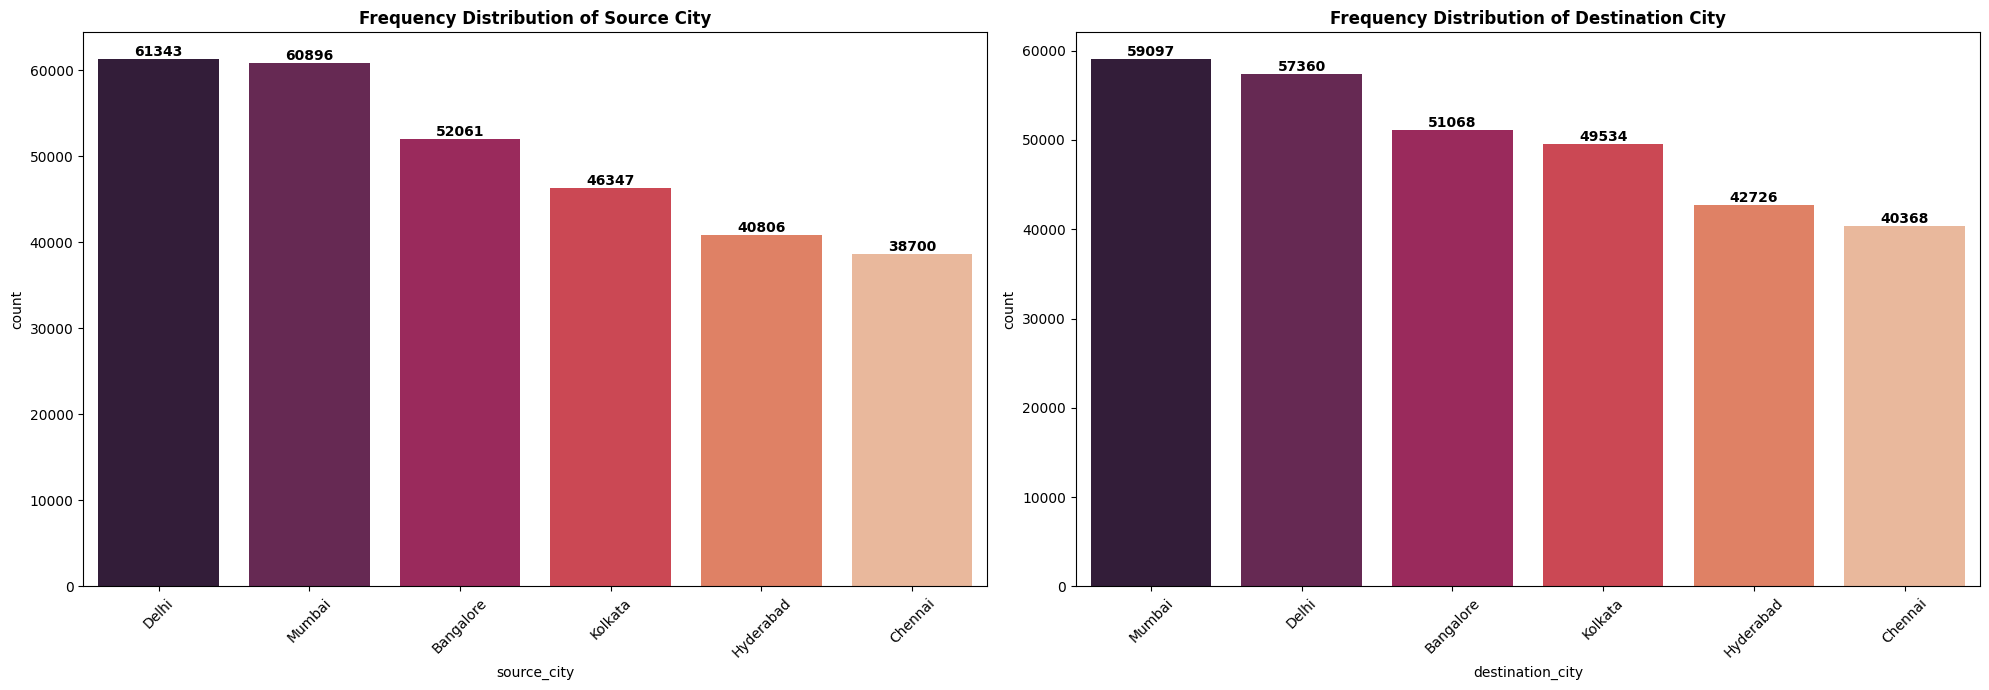

In [74]:
plt.figure(figsize=(20, 7))

palette_dict, order = color_map("source_city")

# --- Barplot 1 ---
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=df_airlines_ma, x="source_city",
                  palette=palette_dict, order=order)
plt.title("Frequency Distribution of Source City", weight = "bold")
plt.xticks(rotation=45)
plt.legend().remove()

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', label_type="edge", fontsize=10, weight = "bold")

palette_dict2, order2 = color_map("destination_city")
# --- Barplot 2 ---
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=df_airlines_ma, x="destination_city", 
                  palette=palette_dict2, order=order2)
plt.title("Frequency Distribution of Destination City", weight = "bold")
plt.xticks(rotation=45)

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', label_type="edge", fontsize=10, weight = "bold")

plt.tight_layout()
plt.show()

**Insight:**

**Source City**

* **Delhi (61k)** and **Mumbai (61k)** are the leading departure hubs, showing clear dominance.
* **Bangalore (52k)** and **Kolkata (46k)** follow with high but comparatively lower frequencies.
* **Hyderabad (41k)** and **Chennai (39k)** account for fewer departures.

This indicates that **Delhi and Mumbai are the two major aviation hubs in India**, reflecting their roles as the political capital and financial center.

**Destination City**

* **Mumbai (59k)** and **Delhi (57k)** are the most common destinations, reinforcing their hub status.
* **Bangalore (51k)** and **Kolkata (49k)** show stable inbound demand.
* **Hyderabad (43k)** and **Chennai (40k)** have relatively fewer arrivals but remain significant in the domestic air network.

Overall, the data reflects a **high concentration of air traffic into Delhi and Mumbai**, while Bangalore, Kolkata, Hyderabad, and Chennai serve as **secondary but important nodes** in the domestic aviation network.

### Q.4. Does price varies with airlines ?

In [98]:
target_feature="price"
df_summary_feature = df_airlines_ma.groupby(by = "airline", as_index= False)\
.agg (
    Count = (target_feature, "count"),
    Mean_target_feature = (target_feature, "mean"),
    Median_target_feature = (target_feature, "median"),
    Std_target_feature = (target_feature, "std")
)
df_summary_feature = df_summary_feature.sort_values(by="Mean_target_feature", ascending=False)
display(df_summary_feature.style.background_gradient(cmap=cmap).set_table_attributes('style="width:75%; margin:auto;"'))

,airline,Count,Mean_target_feature,Median_target_feature,Std_target_feature
5,Vistara,127859,30396.536302,15543.000000,25637.159445
1,Air_India,80892,23507.019112,11520.000000,20905.116909
4,SpiceJet,9011,6179.278881,5654.000000,2999.630406
2,GO_FIRST,23173,5652.007595,5336.000000,2513.865560
3,Indigo,43120,5324.216303,4453.000000,3268.894831
0,AirAsia,16098,4091.072742,3276.000000,2824.055172


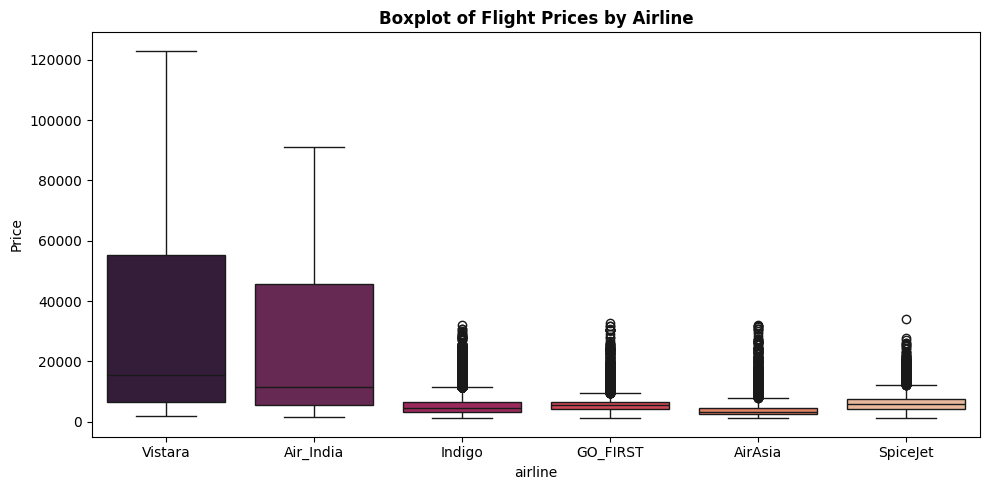

In [84]:
palette_dict, order = color_map("airline")

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_airlines_ma, x="airline", y="price",palette=palette_dict, order=order)
plt.title("Boxplot of Flight Prices by Airline", weight="bold")
plt.xlabel("airline")
plt.ylabel("Price")

plt.tight_layout()
plt.show()

**Answer:**

* **Vistara** and **Air India** show **much higher average and wider price distributions** (means \~30k and \~23k respectively).
* **Low-cost carriers like Indigo, AirAsia, GO\_FIRST, and SpiceJet** have significantly lower averages (means only \~4k–6k).

### Q.5. Does ticket price change based on the departure time and arrival time?

In [96]:
target_feature="price"
df_summary_feature = df_airlines_ma.groupby(by = "departure_time", as_index= False)\
.agg (
    Count = (target_feature, "count"),
    Mean_target_feature = (target_feature, "mean"),
    Median_target_feature = (target_feature, "median"),
    Std_target_feature = (target_feature, "std")
)
df_summary_feature = df_summary_feature.sort_values(by="Mean_target_feature", ascending=False)
display(df_summary_feature.style.background_gradient(cmap=cmap).set_table_attributes('style="width:75%; margin:auto;"'))

,departure_time,Count,Mean_target_feature,Median_target_feature,Std_target_feature
5,Night,48015,23062.146808,7813.000000,23617.883277
4,Morning,71146,21630.760254,8112.000000,22968.909569
2,Evening,65102,21232.361894,7425.000000,23168.515406
1,Early_Morning,66790,20370.676718,7212.000000,22354.875275
0,Afternoon,47794,18179.203331,6663.000000,20928.840445
3,Late_Night,1306,9295.299387,4499.000000,13680.515549


In [97]:
target_feature="price"
df_summary_feature = df_airlines_ma.groupby(by = "arrival_time", as_index= False)\
.agg (
    Count = (target_feature, "count"),
    Mean_target_feature = (target_feature, "mean"),
    Median_target_feature = (target_feature, "median"),
    Std_target_feature = (target_feature, "std")
)
df_summary_feature = df_summary_feature.sort_values(by="Mean_target_feature", ascending=False)
display(df_summary_feature.style.background_gradient(cmap=cmap).set_table_attributes('style="width:75%; margin:auto;"'))

,arrival_time,Count,Mean_target_feature,Median_target_feature,Std_target_feature
2,Evening,78323,23044.371615,8854.000000,23494.642663
4,Morning,62735,22231.076098,7687.000000,23266.076096
5,Night,91538,21586.758341,7584.000000,23298.011624
0,Afternoon,38139,18494.598993,6714.000000,20430.012514
1,Early_Morning,15417,14993.139521,5800.000000,18898.694495
3,Late_Night,14001,11284.906078,4867.000000,16399.121594


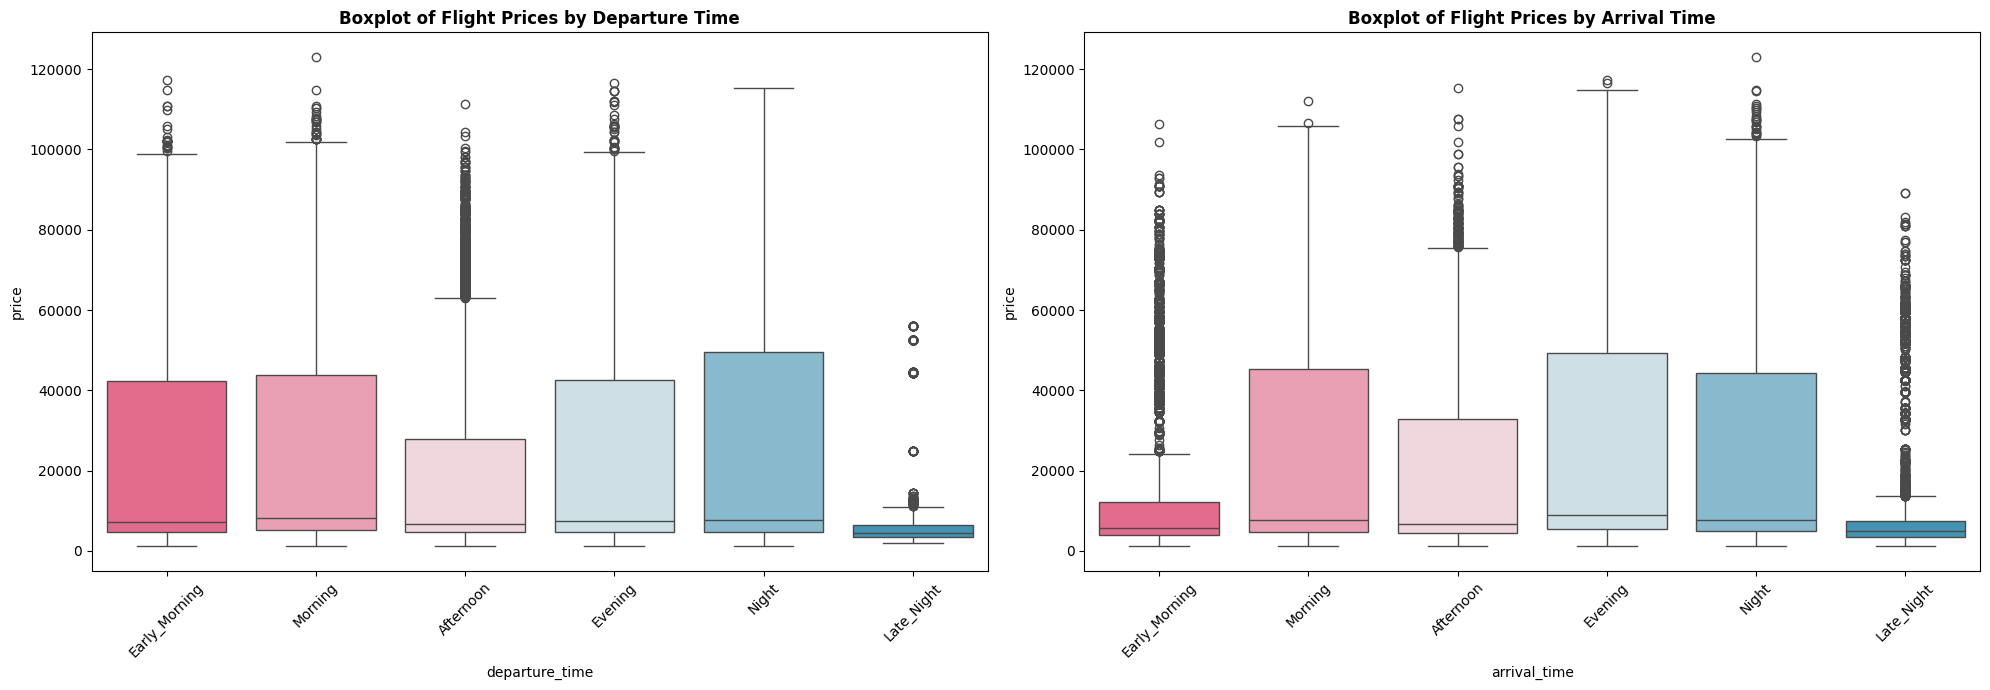

In [90]:
plt.figure(figsize=(20, 7))

order_common = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]
# --- Barplot 1 ---
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data=df_airlines_ma, x="departure_time", y="price",
                  palette=color(n_colors=6), order=order_common)
plt.title("Boxplot of Flight Prices by Departure Time", weight = "bold")
plt.xticks(rotation=45)
plt.legend().remove()

# --- Barplot 2 ---
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(data=df_airlines_ma, x="arrival_time", y="price",
                  palette=color(n_colors=6), order=order_common)
plt.title("Boxplot of Flight Prices by Arrival Time", weight = "bold")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Answer:**

Based on the tables and boxplots of **departure and arrival times**, we can draw the following key observations:

**Departure Time**

* **Morning (71k), Early Morning (67k), and Evening (65k)** are the most common departure slots, covering the majority of flights.
* **Night (48k) and Afternoon (47k)** have fewer flights but are still significant.
* **Late Night (1.3k)** flights are very rare.
* Ticket prices are significantly higher for **Night and Morning** departures, averaging around 21k–23k.
* **Late Night** is the cheapest option (\~9.2k), suggesting that red-eye flights are priced lower to attract demand.

**Arrival Time**

* **Night (91k) and Evening (78k)** account for the largest share, indicating a strong demand for evening arrivals.
* **Morning (62k)** is also common, consistent with overnight flights that land early next day.
* **Afternoon (38k), Early Morning (15k), and Late Night (14k)** are much less frequent.
* The highest average prices occur in the **Evening (\~23k)**, followed by Night and Morning.
* **Late Night** once again has the lowest prices (\~11k), consistent with the departure pattern.

**Boxplot Insights**

* There are many **extreme price outliers** (>100k), mostly for Morning/Night/Evening flights.
* **Afternoon and Late Night** have the lowest median prices, making them attractive for price-sensitive travelers.
* The price differences by time slot highlight that airlines apply **dynamic pricing strategies**, with higher fares at peak hours (Morning/Night/Evening) and lower fares at off-peak hours (Afternoon/Late Night).

**Overall:**

* **Morning and Evening departures** are the most common but also more expensive.
* **Late Night flights** are less frequent and cheaper, appealing to budget-conscious passengers.
* The clear price segmentation reflects **supply-demand dynamics and customer behavior**.

### Q.6. How the price changes with change in Source and Destination?

Base on **Distribution of price by source_city/destination_city** above,

`source_city`

Ticket prices vary significantly depending on the source city. **Delhi generally offers cheaper flights**, while **Chennai and Kolkata are more expensive**. Despite city-level differences, all groups share the same pattern: **high variability and strong right skewness in prices**.

`destination_city`

In summary, **destination city has a strong impact on flight prices**. Delhi consistently emerges as the **least expensive** destination, while Kolkata, Chennai, and Bangalore tend to be **higher-priced markets**.

### Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [95]:
df_airlines_ma["last_minute_booking"] = df_airlines_ma["days_left"].apply(lambda x: True if x in [1,2] else False)
target_feature="price"
df_summary_feature = df_airlines_ma.groupby(by = "last_minute_booking", as_index= False)\
.agg (
    Count = (target_feature, "count"),
    Mean_target_feature = (target_feature, "mean"),
    Median_target_feature = (target_feature, "median"),
    Std_target_feature = (target_feature, "std")
)
df_summary_feature = df_summary_feature.sort_values(by="Mean_target_feature", ascending=False)
display(df_summary_feature.style.background_gradient(cmap=cmap).set_table_attributes('style="width:75%; margin:auto;"'))

,last_minute_booking,Count,Mean_target_feature,Median_target_feature,Std_target_feature
1,True,5953,27421.169326,16739.000000,23236.028160
0,False,294200,20757.498484,7347.000000,22667.366491


In [99]:
perform_statical_testing(total_categories=2, feature="last_minute_booking", df_train=df_airlines_ma, target_feature="price")

🔎 D’Agostino and Pearson Normality Test for 'price' across 'last_minute_booking' groups

 Group: True (n = 5953)
  Statistic : 999.770
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: False (n = 294200)
  Statistic : 41447.037
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'price' by 'last_minute_booking'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 1221501426.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'True' has a higher median 'price' than Group 'False'.


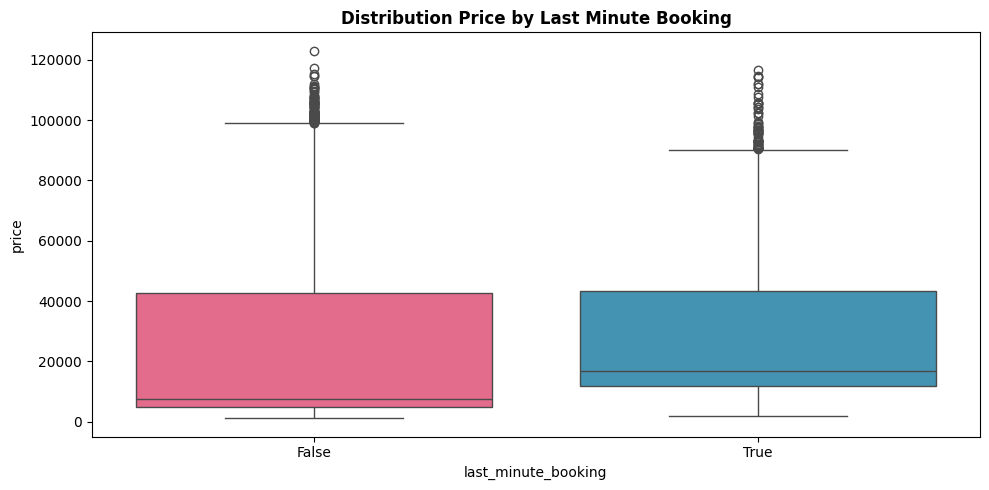

In [100]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_airlines_ma, x="last_minute_booking", y="price", palette=color(n_colors=2))
plt.title("Distribution Price by Last Minute Booking", weight="bold")
plt.xlabel("last_minute_booking")
plt.ylabel("price")
plt.tight_layout()
plt.show()

**Answer**

Looking at the boxplot, the insight is quite clear:

* **Last-minute bookings (1–2 days before, `True`)**: the **median price is significantly higher**, and the **price distribution is wider** → reflecting **sharp price hikes due to high demand** and **yield management strategies** (airlines typically raise fares steeply closer to departure).
* **Early bookings (`False`)**: the **median price is lower**, with some high-price outliers, but overall prices are more stable.

👉 In other words, **the closer to the departure date, the higher and more volatile the ticket prices become**. This is a classic feature of **airline dynamic pricing**.

### Q.8. How does the ticket price vary between Economy and Business class?

**Answer:**

Base on **Distribution of price by class** above

`class`

Class is the most important factor influencing ticket price: **Business fares are several times higher than Economy**, with a statistically significant difference.

### Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [103]:
df_airlines_ma["flag_Delhi_Huderabad"] = ((df_airlines_ma["airline"] == "Vistara") &\
                                          (df_airlines_ma["source_city"] == "Delhi") &\
                                          (df_airlines_ma["destination_city"] == "Hyderabad") &\
                                          (df_airlines_ma["class"] == "Business")).astype(int)

In [104]:
df_summary_feature = df_airlines_ma.groupby(by = "flag_Delhi_Huderabad", as_index= False)\
.agg (
    Count = (target_feature, "count"),
    Mean_target_feature = (target_feature, "mean"),
    Median_target_feature = (target_feature, "median"),
    Std_target_feature = (target_feature, "std")
)
df_summary_feature = df_summary_feature.sort_values(by="Mean_target_feature", ascending=False)
display(df_summary_feature.style.background_gradient(cmap=cmap).set_table_attributes('style="width:75%; margin:auto;"'))

,flag_Delhi_Huderabad,Count,Mean_target_feature,Median_target_feature,Std_target_feature
1,1,1660,47939.840361,51697.000000,11856.129244
0,0,298493,20739.227185,7423.000000,22653.489709


**Answer**

The estimated average price for a Vistara Business Class flight from Delhi to Hyderabad is around 52,000–53,000.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


In [106]:
skew_feature, skew_df = check_skewness(data=df_airlines, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
price                          |  +1.061377 | Highly skewed
duration                       |  +0.602899 | Moderately skewed
days_left                      |  -0.035464 | Approximately symmetric
----------------------------------------------------------------------


In [109]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None,
    dataset="Train data"
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []
    pt_dict          = {}

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            pt_dict[col] = pt
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed, pt_dict

In [110]:
processed_df, transformed_columns, sparse_columns, skewed_columns, pt_dict = handle_skewed_features(df=df_airlines, num_features=skew_feature)
num_features = ["PT_duration", "days_left", "PT_price"]
skew_feature, skew_df = check_skewness(data=processed_df, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
PT_price                       |  +0.113135 | Approximately symmetric
PT_duration                    |  -0.061404 | Approximately symmetric
days_left                      |  -0.035464 | Approximately symmetric
----------------------------------------------------------------------


**Observations from the Skewness Table (`processed_df`):**

**Approximately Symmetric**:

* Several features, such as:

  * `PT_price` and `PT_duration` less than 0.5.
  * This indicates that **Yeo-Johnson transformation was effective** for these features.

## Re-checking Outliers

In [111]:
checking_outlier(list_feature=num_features, df=processed_df, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,PT_duration,102


## Create Test Set

🔴 Suppose you chatted with experts who told you that the **days_left** is a very important attribute to predict **PT_price**. <br>
🔴 We may want to ensure that the test set is representative of the various categories of total **days_left** in the whole dataset. Since the **days_left** is a continuous numerical attribute, we first need to create category attribute.

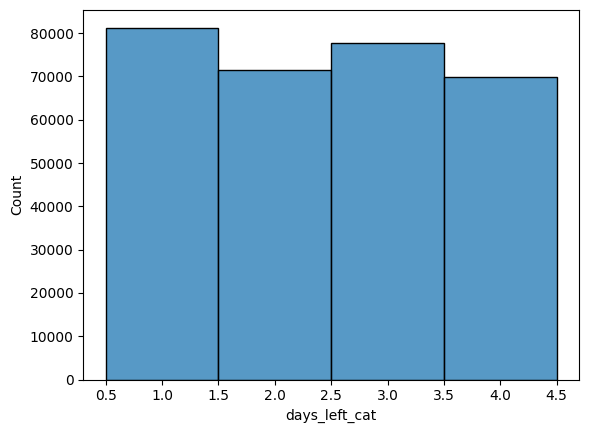

In [112]:
processed_df["days_left_cat"] = pd.qcut(processed_df["days_left"],
                                              q=4,
                                              labels=[1, 2, 3, 4])

sns.histplot(data=processed_df["days_left_cat"]);

In [113]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_df, processed_df["days_left_cat"]):
    start_train_set = processed_df.iloc[train_index]
    start_test_set = processed_df.iloc[test_index]

In [114]:
# Now we should remove the days_left_cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("days_left_cat", axis=1, inplace=True)

## Scale and Encode

In [116]:
df_air_new = start_train_set.drop("PT_price", axis=1)
df_air_label = start_train_set["PT_price"].copy()

list_feature_num_robust = ["PT_duration"]
list_feature_num_stand = ["days_left"]
list_feature_cat_onehot = ["airline", "source_city", "departure_time", "stops", "arrival_time", "destination_city", "class"]

In [117]:
# There are no **missing values** in dataset. But we will still handle missing values ​​to check the data in the future.
num_robust_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot)
])

preprocessor.fit(df_air_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['PT_duration']),
                                ('num_standard',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['days_left']),
                                ('cat_onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['airline', 'source_city', 'departure_time',
                                  'stops', 'arrival_time', 'destination_city',
                                  'class'])])

In [118]:
df_air_new_prepared = preprocessor.transform(df_air_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__PT_duration',
 'num_standard__days_left',
 'cat_onehot__airline_AirAsia',
 'cat_onehot__airline_Air_India',
 'cat_onehot__airline_GO_FIRST',
 'cat_onehot__airline_Indigo',
 'cat_onehot__airline_SpiceJet',
 'cat_onehot__airline_Vistara',
 'cat_onehot__source_city_Bangalore',
 'cat_onehot__source_city_Chennai',
 'cat_onehot__source_city_Delhi',
 'cat_onehot__source_city_Hyderabad',
 'cat_onehot__source_city_Kolkata',
 'cat_onehot__source_city_Mumbai',
 'cat_onehot__departure_time_Afternoon',
 'cat_onehot__departure_time_Early_Morning',
 'cat_onehot__departure_time_Evening',
 'cat_onehot__departure_time_Late_Night',
 'cat_onehot__departure_time_Morning',
 'cat_onehot__departure_time_Night',
 'cat_onehot__stops_one',
 'cat_onehot__stops_two_or_more',
 'cat_onehot__stops_zero',
 'cat_onehot__arrival_time_Afternoon',
 'cat_onehot__arrival_time_Early_Morning',
 'cat_onehot__arrival_time_Evening',
 'cat_onehot__arrival_time_Late_Night',
 'cat_onehot__arrival_time_Morning',
 'cat_

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

## **Root Mean Squared Error (RMSE)**

**Definition:**

**RMSE (Root Mean Squared Error)** is a regression metric that measures the square root of the average of the squared differences between predicted values and actual values. It captures the **typical magnitude of prediction error** in the **same units** as the target and **penalizes large errors more strongly** due to the squaring step.

**Formula:**

$$
\text{RMSE} \;=\; \sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(\hat{y}_i - y_i\right)^2}
$$

* $y_i$: Actual value
* $\hat{y}_i$: Predicted value
* $n$: Number of observations

**Characteristics:**

* **Non-negative** (≥ 0); **lower is better**.
* Expressed in the **same units** as the target variable (e.g., INR, meters).
* **Sensitive to outliers** (large errors are heavily penalized).
* Useful when you want to **punish large mistakes** and care about absolute scale.
* Closely related to **MSE**: $\text{RMSE} = \sqrt{\text{MSE}}$.

**RMSE vs. Other Metrics (quick compare):**

* **RMSE vs. MAE**: RMSE penalizes large errors more; MAE treats all errors linearly.
* **RMSE vs. RMSLE**: RMSE measures **absolute errors**; RMSLE focuses on **relative/percentage-like errors** and log-scale differences.

📎 **Important Notes:**

* Works with any real-valued targets; **no log requirements** (unlike RMSLE).
* Because it’s scale-dependent, **compare RMSE only across models on the same dataset/target**.
* If the target distribution is highly skewed or has heavy tails, consider also reporting **MAE** or using **log-transform** of the target.

**References:**

* Scikit-learn: [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
* Wikipedia: [Root-mean-square deviation](https://en.wikipedia.org/wiki/Root-mean-square_deviation)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Modeling</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Modeling
    </h1>
</div>

In [121]:
seed = 42
max_iter = 50000
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [122]:
def shap_plot(model, X_test, list_feature, type = None):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance")
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [138]:
# Function to evaluate regression models
def evaluate_model(model, X_train, X_val, y_train, y_val, pt=None, show_shap_plot = True):
    RESET = "\033[0m"
    BLUE = "\033[94m"
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Back-transform predictions and ground truth
    if pt is not None:
        y_val_real = pt.inverse_transform(y_val.values.reshape(-1, 1)).flatten()
        y_pred_real = pt.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    else:
        y_val_real = y_val
        y_pred_real = y_pred
    
    # Metrics: RMSE
    rmse = np.sqrt(mean_squared_error(y_val_real, y_pred_real))
    print(f"Model: {model.__class__.__name__}{RESET}")
    print(f"Root Mean Squared Error (RMSE): {BLUE}{rmse:.4f}{RESET}")
    print("-" * 80)

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    # ----- Plot 1: Predicted vs. Actual -----
    axs[0].scatter(y_val_real, y_pred_real, alpha=0.4, color="royalblue")
    axs[0].plot(
        [y_val_real.min(), y_val_real.max()],
        [y_val_real.min(), y_val_real.max()],
        "r--", lw=2, label="Perfect Prediction (y=x)"
    )
    axs[0].set_xlabel("Actual Values (price)")
    axs[0].set_ylabel("Predicted Values (price)")
    axs[0].set_title("Predicted vs. Actual (Validation Set)", weight = "bold", pad=20)
    axs[0].legend()
    axs[0].grid(True, alpha=0.2)

    # ----- Plot 2: Residual Plot -----
    residuals = y_val_real - y_pred_real
    axs[1].scatter(y_val_real, residuals, alpha=0.5)
    axs[1].axhline(0, color="red", linestyle="--", lw=2)
    axs[1].set_xlabel("Actual Values (price)")
    axs[1].set_ylabel("Prediction Error (Residuals)")
    axs[1].set_title("Residual Plot", weight = "bold", pad=20)
    axs[1].grid(True, alpha=0.2)

    # Tối ưu bố cục
    plt.tight_layout()
    plt.show() 

    if show_shap_plot:
        shap_plot(model = model, X_test = X_val, list_feature = list_feature_prepared)

    return rmse

In [124]:
X_val = start_test_set.drop("PT_price", axis=1)
y_val = start_test_set["PT_price"].copy()
X_val_prepared = preprocessor.transform(X_val)

## XGBRegressor

In [142]:
from xgboost import XGBRegressor

param_xgb = {
    "n_estimators": 666, 
    "learning_rate": 0.01710168547648902, 
    "max_depth": 12, 
    "min_child_weight": 1.181824013500254, 
    "gamma": 0.018376541710248828, 
    "subsample": 0.8290656590514883, 
    "colsample_bytree": 0.9761697775640144, 
    "reg_alpha": 0.000818955967460667, 
    "reg_lambda": 1.0978774243707958e-07,
    "grow_policy": "depthwise",
    "random_state": 42,
    "n_jobs": -1,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "verbosity": 0
}

model_xgb = XGBRegressor(**param_xgb)
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9761697775640144, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, feature_weights=None,
             gamma=0.018376541710248828, grow_policy='depthwise',
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01710168547648902, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=1.181824013500254, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=666,
             n_jobs=-1, num_parallel_tree=None, ...)

Model: XGBRegressor
Root Mean Squared Error (RMSE): 2725.4689
--------------------------------------------------------------------------------


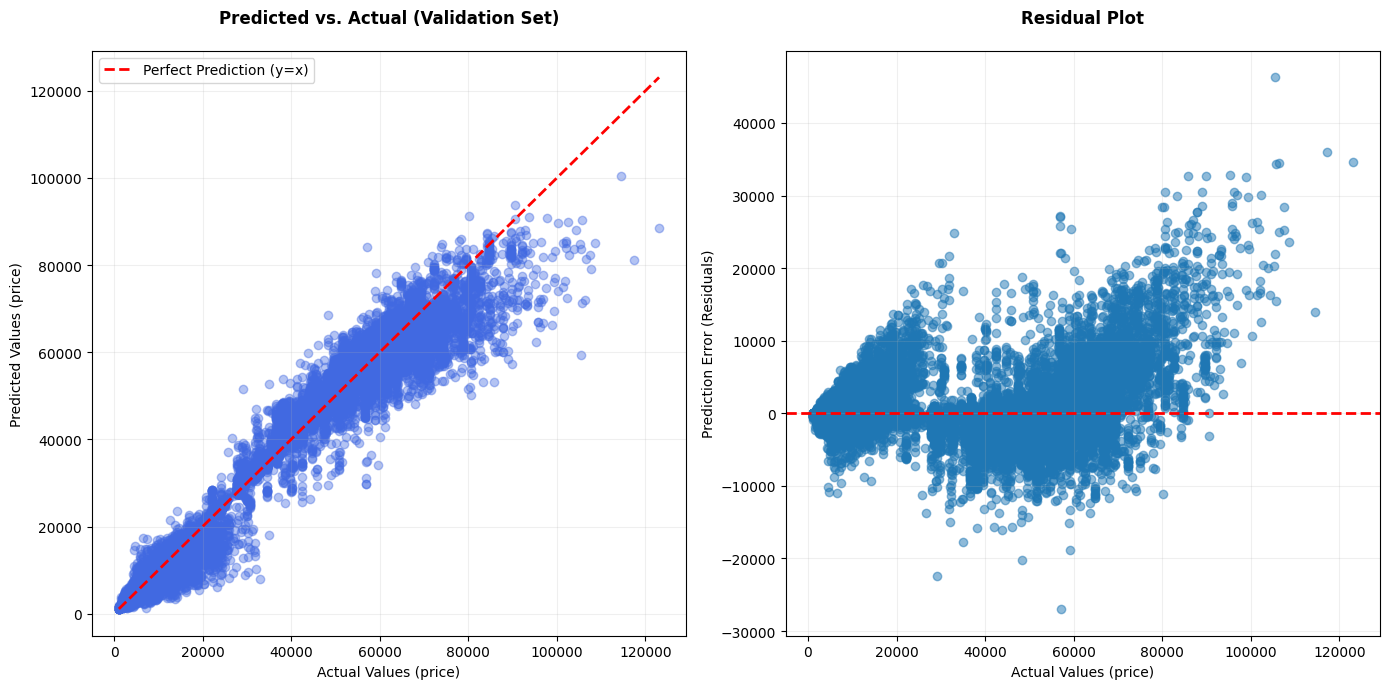

In [143]:
weight_rmse_xgb = evaluate_model(model = model_xgb, X_train = df_air_new_prepared, 
                   X_val = X_val_prepared , y_train = df_air_label, y_val=y_val, pt = pt_dict["price"], show_shap_plot = False)

## CatBoostRegressor

In [150]:
from catboost import CatBoostRegressor

param_cb = {
    "bootstrap_type": "Bernoulli", 
    "iterations": 1880, 
    "learning_rate": 0.16407737631183125, 
    "depth": 10, 
    "l2_leaf_reg": 3.5596476679931164, 
    "subsample": 0.7270337443913074, 
    "colsample_bylevel": 0.7984639158128477, 
    "min_data_in_leaf": 33, 
    "random_strength": 3.1521994202620753,
    "loss_function": "RMSE",
    "eval_metric": "RMSE",
    "random_seed": 42,
    "verbose": 0    
}

model_cb = CatBoostRegressor(**param_cb)
model_cb

Model: CatBoostRegressor
Root Mean Squared Error (RMSE): 2885.4666
--------------------------------------------------------------------------------


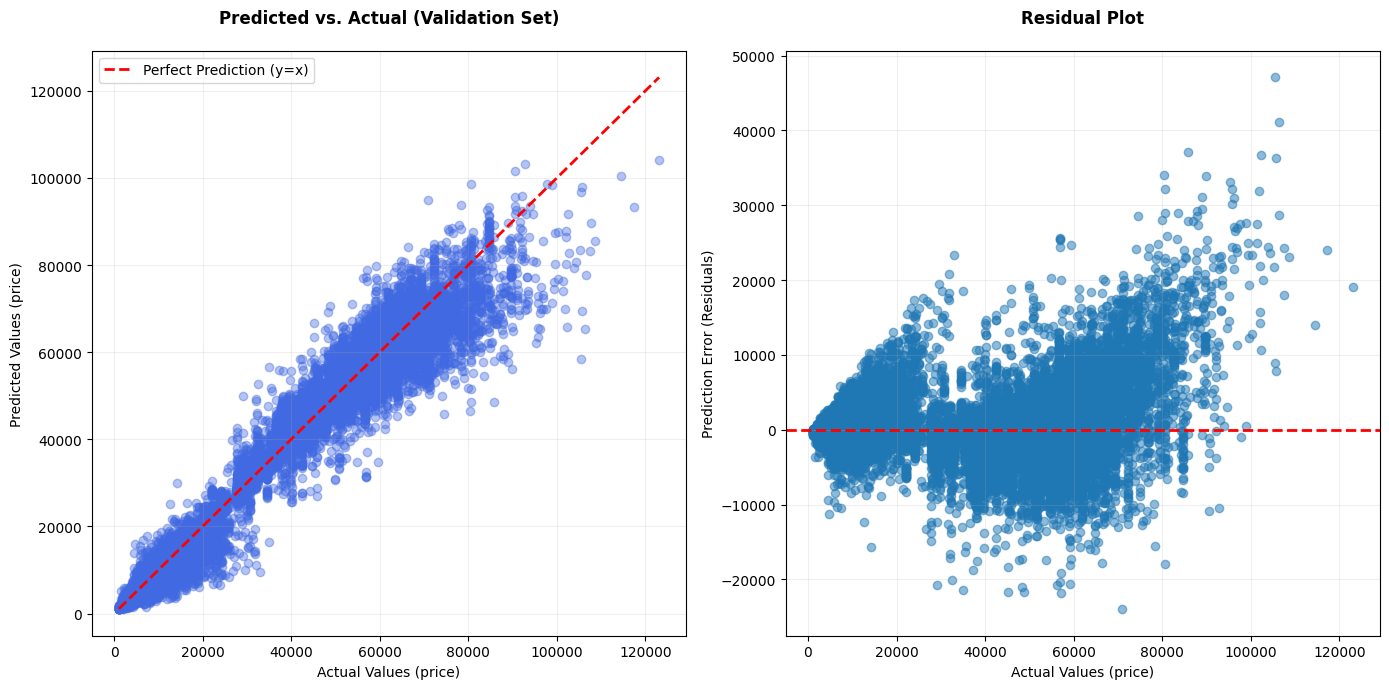

In [151]:
weight_rmse_cb = evaluate_model(model = model_cb, X_train = df_air_new_prepared, 
                   X_val = X_val_prepared , y_train = df_air_label, y_val=y_val, pt = pt_dict["price"], show_shap_plot = False)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>


## VotingClassifier

In [157]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators=[
    ("cb", model_cb),
    ("xgb", model_xgb)
], n_jobs=1, weights=[weight_rmse_cb, weight_rmse_xgb])

cv_scores = cross_val_score(
    voting_reg,
    X=df_air_new_prepared,
    y=df_air_label,
    cv=kfold,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

mean_score = -cv_scores.mean()
std_score = cv_scores.std()

print(f"Cross-validated RMSE (mean ± std): {mean_score:.4f} ± {std_score:.4f}")

Cross-validated RMSE (mean ± std): 0.1381 ± 0.0013


Model: VotingRegressor
Root Mean Squared Error (RMSE): 2726.8211
--------------------------------------------------------------------------------


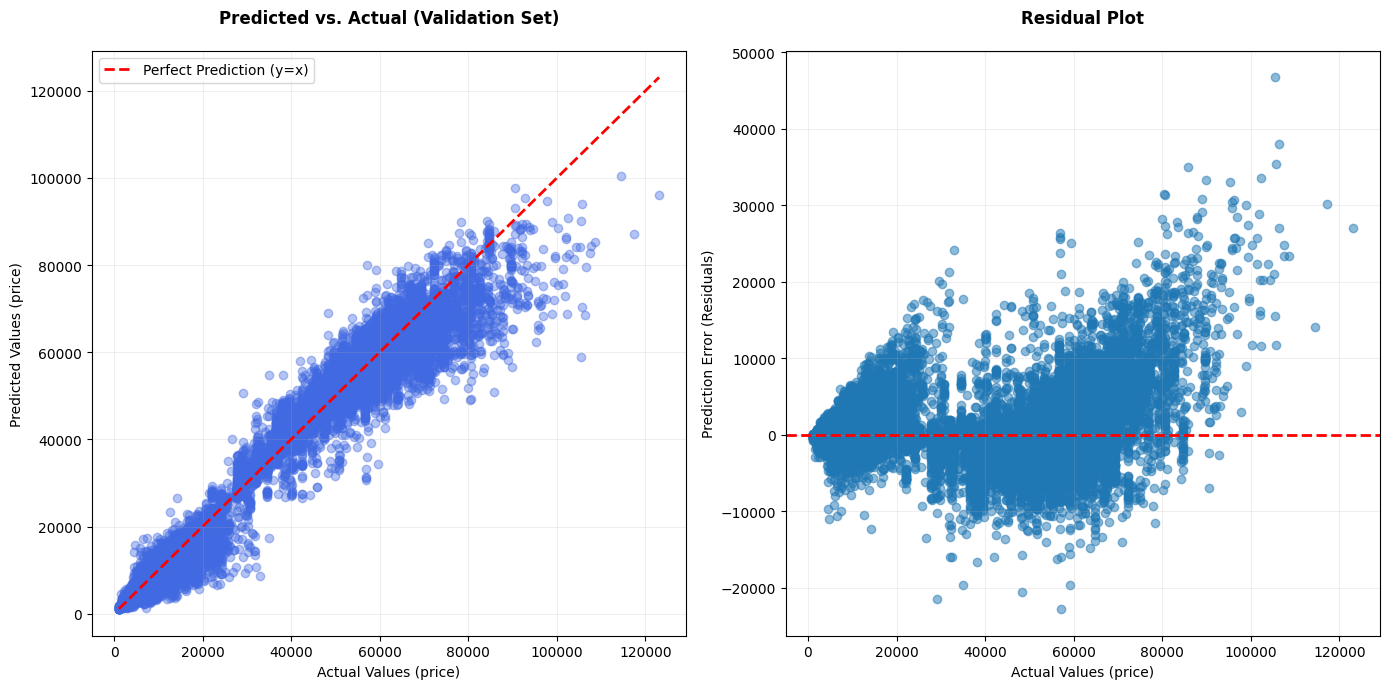

In [158]:
weight_rmse_vc = evaluate_model(model = voting_reg, X_train = df_air_new_prepared, 
                   X_val = X_val_prepared , y_train = df_air_label, y_val=y_val, pt = pt_dict["price"], show_shap_plot = False)

PermutationExplainer explainer: 201it [00:47,  4.06it/s]                         


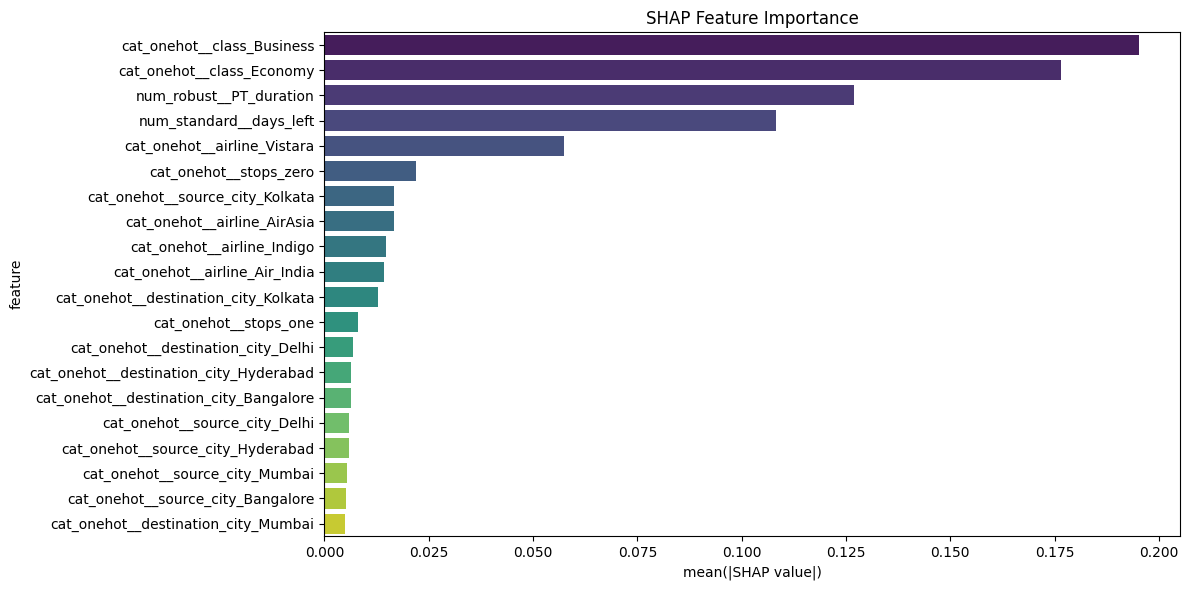

In [159]:
shap_sample = X_val_prepared.iloc[:200] if isinstance(X_val_prepared, pd.DataFrame) else X_val_prepared[:200]
shap_plot(model=voting_reg, X_test=shap_sample, list_feature=list_feature_prepared, type="bar")

PermutationExplainer explainer: 201it [00:44,  3.47it/s]                         


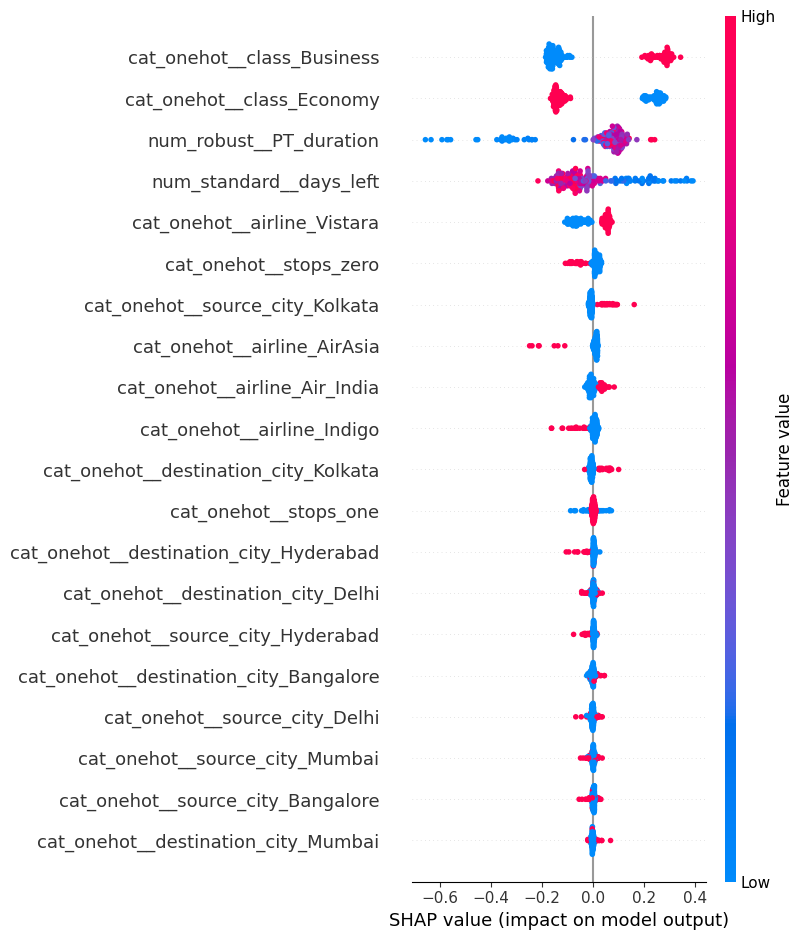

In [160]:
shap_plot(model=voting_reg, X_test=shap_sample, list_feature=list_feature_prepared)

**Key Pricing Drivers – Flight Ticket Prediction**

* **Ticket Class** is the strongest driver:

  * Business → significantly higher prices
  * Economy → lower prices

* **Timing factors** matter:

  * Longer flight duration → higher fares
  * Fewer days left to departure → price surges

* **Flight type:**

  * Non-stop flights → more expensive than connecting flights

* **Airlines & Routes:**

  * Certain carriers (e.g., Vistara) and specific cities show price premiums, though less influential

**Overall Insight:**
The model aligns with real-world airline pricing logic – **Business class, non-stop, long-haul, and last-minute bookings drive the highest fares.**

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
